#Gold price prediction project from scikit learn module



#1. Get the data

ข้อมูลทั้งหมดที่ใช้
1. ราคาทองคำ (บาท)
2. หุ้นทองคำ (USD)
3. หุ้นกองทุนทองของต่างประเทศ (USD)
4. หุ้นกองทุนทองของประเทศไทย (บาท)
5. อัตราดอกเบี้ยของธนาคารกสิกรไทย (%ต่อปี)
6. อัตราดอกเบี้ยของธนาคารกรุงไทย (%ต่อปี)
7. ราคาน้ำมันดิบ (USD)
8. ค่าเงินดอลลาร์ (บาท)

In [ ]:
import yfinance as yf

เริ่มโปรเจค

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

In [ ]:
# download ข้อมูลจาก google drive ที่เก็บข้อมูลไว้

# https://docs.google.com/spreadsheets/d/1eqFm6ZmsXkyMwSktSYlhn05S68eodYRx/edit?usp=share_link&ouid=115968200247684605511&rtpof=true&sd=true
! gdown --id 1eqFm6ZmsXkyMwSktSYlhn05S68eodYRx #ราคาทอง

# https://docs.google.com/spreadsheets/d/1M9fk_UXJg07W1UoieIMF-25HdH4neVkP/edit?usp=sharing&ouid=115968200247684605511&rtpof=true&sd=true
! gdown --id 1M9fk_UXJg07W1UoieIMF-25HdH4neVkP #อัตราดอกเบี้ยของธนาคารกสิกรไทย

# https://drive.google.com/file/d/1MEfzCfO6YxQwFPAsN0jxUlQMc-9WO6Vc/view?usp=sharing
!gdown --id 1MEfzCfO6YxQwFPAsN0jxUlQMc-9WO6Vc # อััตราแลกเปลี่ยนย้อนหลัง



/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eqFm6ZmsXkyMwSktSYlhn05S68eodYRx
To: /content/rakathong2013-2022.xlsx
100% 87.2k/87.2k [00:00<00:00, 5.67MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1M9fk_UXJg07W1UoieIMF-25HdH4neVkP
To: /content/อัตราดอกเบี้ยกสิกร.xlsx
100% 40.6k/40.6k [00:00<00:00, 46.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: htt

##ข้อมูลราคาทองคำในแต่ละวัน (บาทไทย)

แหล่งที่มา : https://www.sanook.com/money/goldrate/?fbclid=IwAR3I241ON0dvovaDf6mJ2wl4MMEqS3it1ksAi5JMFseoC6bWQ6uU33KZzXY

In [ ]:
#ราคาทองคำ
Gold_df = pd.read_excel('/content/rakathong2013-2022.xlsx')
Gold_df.head()

ราคาทอง มกราคม   Unnamed: 1  Unnamed: 2    Unnamed: 3   Unnamed: 4
0          วันที่         NaN         NaN  รับซื้อ(บาท)  ขายออก(บาท)
1               1         NaN         NaN           NaN          NaN
2               2         NaN         NaN         24200        24300
3               3         NaN         NaN         24200        24300
4               4         NaN         NaN         23700        23800

##ข้อมูลหุ้นที่เกี่ยวข้องกับทองคำ

In [ ]:
# หุ้นทองคำต่างประเทศ
GStock_price = yf.Ticker('GC=F') #ตัวย่อของหุ้น
G_df = GStock_price.history(interval = '1d', start = '2013-1-1', end = '2022-12-31')

# กองทุนทองต่างประเทศ
AStock_price = yf.Ticker('GLD')
A_df = AStock_price.history(interval = '1d', start = '2013-1-1', end = '2022-12-31')

# กองทุนทองประเทศไทย
TStock_price = yf.Ticker('GLD.BK')
T_df = TStock_price.history(interval = '1d', start = '2013-1-1', end = '2022-12-31')

# ราคาน้ำมันดิบ
CStock_price = yf.Ticker('CL=F')
C_df = CStock_price.history(interval = '1d', start = '2013-1-1', end = '2022-12-31')


In [ ]:
G_df.head(3)

Open         High          Low        Close  \
Date                                                                            
2013-01-02 00:00:00-05:00  1672.800049  1693.800049  1670.000000  1687.900024   
2013-01-03 00:00:00-05:00  1686.099976  1686.800049  1662.000000  1673.699951   
2013-01-04 00:00:00-05:00  1647.000000  1658.300049  1625.699951  1648.099976   

                           Volume  Dividends  Stock Splits  
Date                                                        
2013-01-02 00:00:00-05:00      35        0.0           0.0  
2013-01-03 00:00:00-05:00     140        0.0           0.0  
2013-01-04 00:00:00-05:00     199        0.0           0.0

##ข้อมูลของปัจจัยที่มีผลต่อราคาทอง

อ้างอิงจาก : https://www.aurora.co.th/news/page_news/205

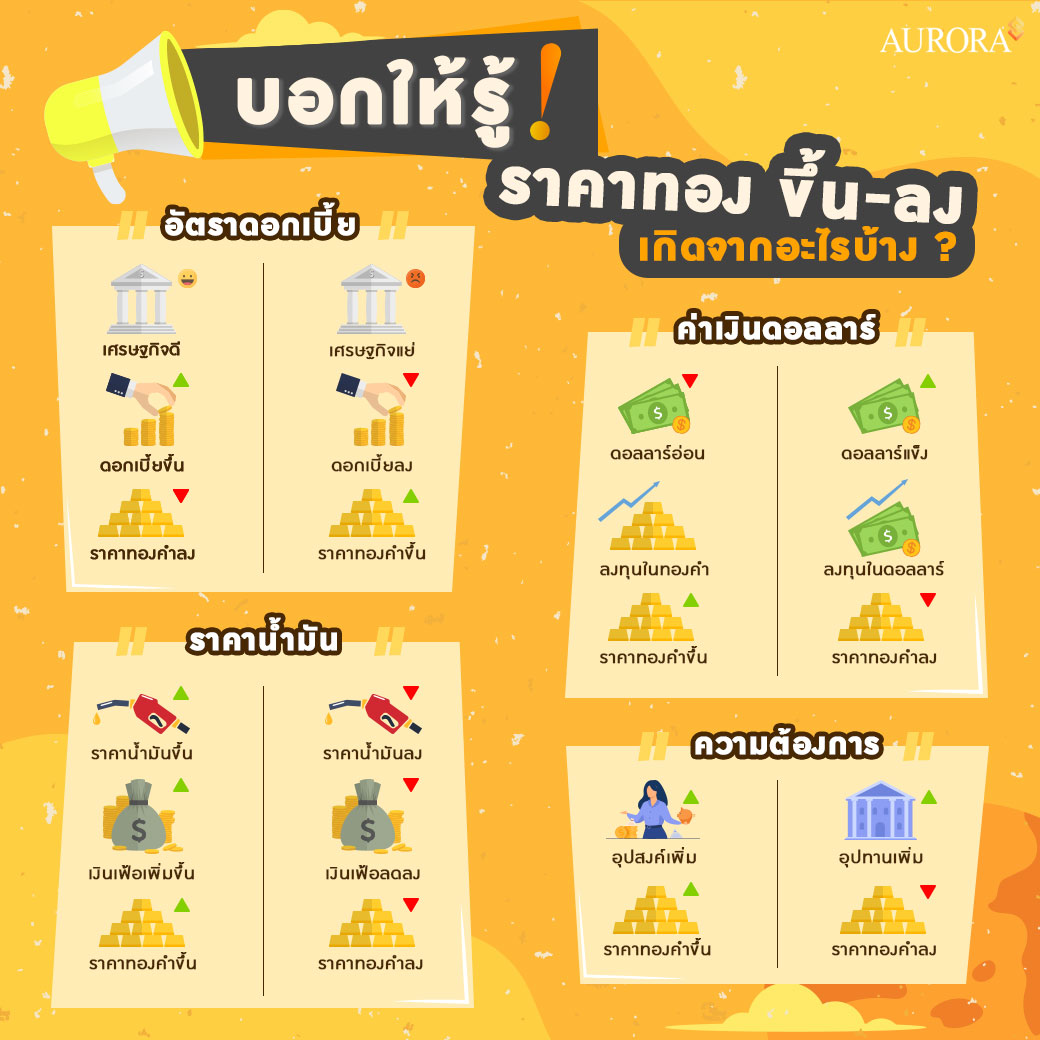

1. ปัจจัยที่มีผลต่อราคาทองคำ ขึ้นอยู่กับอัตราดอกเบี้ย

อัตราดอกเบี้ย จากค่าใช้จ่ายต่างๆ ในการนำเข้าและส่งออกทองคำ รวมไปถึงค่าขนส่ง ดอกเบี้ยธนาคาร ค่าความเสี่ยง หรือค่าประกันภัยต่างๆ เนื่องจากนักลงทุนมีความต้องการซื้อทองคำเป็นจำนวนมาก และปริมาณทองคำที่มีอยู่ภายในประเทศไม่เพียงพอ จึงต้องอาศัยการนำเข้าทองคำจากต่างประเทศ จึงทำให้เกิดค่าใช้จ่ายต่างๆตามมา

และหากนโยบายดอกเบี้ยถูกปรับขึ้น จะแสดงให้เห็นถึงสภาวะเศรฐกิจที่เริ่มดี ค่าเงินดอลลาร์ปรับตัวเพิ่มสูงขึ้น มีความเชื่อมั่นมากขึ้น ส่งผลให้ราคาทองคำก็จะปรับตัวลง ในทางกลับกัน หากนโยบายดอกเบี้ยถูกลดลง จะแสดงให้เห็นถึงสภาะเศรษฐกิจที่เริ่มไม่ดี ค่าเงินดอลลาร์ปรับตัวลง ความเชื่อมั่นที่ลดลง และราคาทองคำก็จะปรับตัวสูงขึ้น


2. ปัจจัยที่มีผลต่อราคาทองคำ ขึ้นอยู่กับราคาน้ำมัน

ราคาน้ำมัน ก็เป็นอีกหนึ่งปัจจัยที่ส่งผลต่อราคาทองคำเป็นอย่างมาก ซึ่งราคาน้ำมันเป็นตัวที่ทำให้เกิดสภาวะเงินเฟ้อ โดยสภาวะเงินเฟ้อที่เกิดขึ้นกับราคาทองคำนั้นจะเคลื่อนไหวไปในทิศทางเดียวกัน และราคาน้ำมันมีเกี่ยวข้องแบบเป็นไปในทิศทางเดียวกันกับราคาทองคำด้วยเช่นกัน

หากราคาน้ำมันถูกปรับเพิ่มขึ้น สภาวะเงินเฟ้อก็จะเพิ่มขึ้น ส่งผลให้ราคาทองคำก็จะถูกปรับขึ้นสูง ในทางกลับกัน หากราคาน้ำมันถูกปรับตัวลดลง สภาวะเงินเฟ้อก็จะลดลง และราคาทองคำก็จะปรับตัวลงตามกัน


3. ปัจจัยที่มีผลต่อราคาทองคำ ขึ้นอยู่กับค่าเงินดอลลาร์

เนื่องจากค่าเงินดอลลาร์เป็นสกุลเงินที่มีการใช้กันมาก อีกทั้งค่าเงินดอลลาร์ยังเป็นสื่อกลางที่ใช้ในการซื้อ-ขาย ส่งผลให้ค่าเงินดอลลาร์มีความผันผวนกับราคาทองคำ

การที่ค่าเงินดอลลาร์อ่อนตัวลง จะส่งผลดีกับราคาทองที่เป็นสินทรัพย์ปลอดภัย ที่สามารถเก็บมูลค่า และส่งผลให้กระแสเงินของแต่ละประเทศไหลเข้าสู่ทองคำ และทำให้ราคาทองคำมีมูลค่าเพิ่มสูงขึ้น ในทางกลับกัน หากค่าเงินดอลลาร์แข็งตัวขึ้น จะส่งผลราคาทองคำปรับตัวลง และนักลงทุนทองคำจะหันมาลงทุนในสกุลเงินดอลลาร์แทน


4. ปัจจัยที่มีผลต่อราคาทองคำ ขึ้นอยู่กับ Demand และ Supply หรือความต้องการ

Demand หรือ อุปสงค์ คือความต้องการในทองคำ ที่มาจาก 3 กลุ่มใหญ่หลักๆ ได้แก่ ภาคเครื่องประดับ ภาคการลงทุน และภาคอุตสาหกรรมการผลิตและการแพทย์ รวมไปถึงการที่ภาครัฐของแต่ละประเทศ มีการนำทุนสำรองไปซื้อทองคำมากขึ้น เพื่อลดความเสี่ยงที่จะเกิดจากการเกาะตัวอยู่ในพันธบัตรรัฐบาลสหรัฐ

หากมีความต้องการที่จะซื้อทองคำสูง จะส่งผลให้ราคาทองคำปรับสูงขึ้นอีกด้วย และในทางกลับกัน หากมีความต้องการซื้อทองคำต่ำ ราคาทองคำก็จะถูกปรับลงด้วยเช่นกัน

Supply หรือ อุปทาน คือ ความต้องการขายทองคำ ที่มาจาก 3 กลุ่มใหญ่หลักๆ ได้แก่ ผลผลิตทองคำที่มาจากเหมืองทอง แรงขายจากธนาคารกลางของแต่ละประเทศ และสุดท้ายปริมาณทองคำเก่าๆที่มีการหมุนเวียนอยู่ในระบบ

Demand และ Supply หรือความต้องการภายในประเทศไทย จะพิจารณาจากอัตรา Gold Spot และค่าเงินบาทของไทย ที่มีการเปลี่ยนแปลงอยู่ตลอดเวลา นอกจากนี้แล้วยังต้องคำนึงถึงความต้องการภายในประเทศเป็นหลัก เพื่อการที่จะตัดสินใจประกาศราคาทองคำภายในประเทศ ของแต่ละครั้ง

แหล่งที่มาของข้อมูล

1. อัตราดอกเบี้ย : https://www.bot.or.th/th/statistics/interest-rate.html?fbclid=IwAR3KkJBioJycIadvcql85mbj7NVknCB841sfadGic2-RCu1gntLalHnTUaY

2. ค่าเงินดอลลาร์ : https://th.investing.com/currencies/usd-thb-historical-data?fbclid=IwAR19ZQ_mN97A1DE4YgjBXYRdd4k585c8FE1vKQ3U6037mnYYyFedRPxsAsc

In [ ]:
# อัตราดอกเบี้ยธนาคารกสิกรไทย
RKbank_df = pd.read_excel("/content/อัตราดอกเบี้ยกสิกร.xlsx")

# ค่าเงินดอลลาร์
USD_df = pd.read_csv("/content/อัตราแลกเปลี่ยนย้อนหลัง USD_THB-2.csv")

1. อัตราดอกเบี้ย

In [ ]:
RKbank_df.head()

ข้อมูลอัตราดอกเบี้ยเงินฝากย้อนหลัง (กสิกรไทย)
0                  ตั้งแต่ 01/01/2013 ถึง 31/12/2022
1  วันที่|ออมทรัพย์|ประจำ 3 เดือน|ประจำ 6 เดือน|ป...
2  02 ม.ค. 2556|0.7500|1.6000-2.0000|1.9500-2.250...
3  03 ม.ค. 2556|0.7500|1.6000-2.0000|1.9500-2.250...
4  04 ม.ค. 2556|0.7500|1.6000-2.0000|1.9500-2.250...

2. ราคาน้ำมันดิบ

In [ ]:
C_df.head(3)

Open       High        Low      Close  Volume  \
Date                                                                            
2013-01-02 00:00:00-05:00  91.779999  93.870003  91.559998  93.120003  203865   
2013-01-03 00:00:00-05:00  92.910004  93.300003  92.489998  92.919998  189812   
2013-01-04 00:00:00-05:00  92.860001  93.209999  91.519997  93.089996  210747   

                           Dividends  Stock Splits  
Date                                                
2013-01-02 00:00:00-05:00        0.0           0.0  
2013-01-03 00:00:00-05:00        0.0           0.0  
2013-01-04 00:00:00-05:00        0.0           0.0

3. ค่าเงินดอลลาร์

In [ ]:
USD_df.head(3)

วันเดือนปี  ล่าสุด  ราคาเปิด  สูงสุด  ต่ำสุด  ปริมาณ % เปลี่ยน
0  12/30/2022   34.61     34.61  34.670  34.490     NaN    -0.03%
1  12/29/2022   34.62     34.77  34.770  34.575     NaN    -0.46%
2  12/28/2022   34.78     34.64  34.825  34.585     NaN     0.52%

#2. Explore the data

## 2.1 จัดเก็บ และรวบรวมข้อมูล จาก Data Source ต่าง ๆ ให้อยู่ในรูปแบบที่พร้อมใช้งาน (ภายใต้โครงสร้างข้อมูลที่เหมาะสม)

In [ ]:
# ข้อมูลยังไม่สามารถนำมาใช้งานอะไรได้เลย คือ อัตราดอกเบี้ย

RKbank_df.head()

ข้อมูลอัตราดอกเบี้ยเงินฝากย้อนหลัง (กสิกรไทย)
0                  ตั้งแต่ 01/01/2013 ถึง 31/12/2022
1  วันที่|ออมทรัพย์|ประจำ 3 เดือน|ประจำ 6 เดือน|ป...
2  02 ม.ค. 2556|0.7500|1.6000-2.0000|1.9500-2.250...
3  03 ม.ค. 2556|0.7500|1.6000-2.0000|1.9500-2.250...
4  04 ม.ค. 2556|0.7500|1.6000-2.0000|1.9500-2.250...

เปลี่ยนให้เป็น DataFrame ที่พร้อมใช้งาน

In [ ]:
# สร้าง columns ของข้อมูล

columns = RKbank_df.iloc[1][0].split('|')

In [ ]:
columns

['วันที่',
 'ออมทรัพย์',
 'ประจำ 3 เดือน',
 'ประจำ 6 เดือน',
 'ประจำ 12 เดือน',
 'ประจำ 24 เดือน']

In [ ]:
RKbank_df = RKbank_df.iloc[2:]

In [ ]:
RKbank_df = RKbank_df['ข้อมูลอัตราดอกเบี้ยเงินฝากย้อนหลัง (กสิกรไทย)'].str.split('|', expand = True)

In [ ]:
RKbank_df.head()

0       1              2              3              4       5
2  02 ม.ค. 2556  0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500  2.5500
3  03 ม.ค. 2556  0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500  2.5500
4  04 ม.ค. 2556  0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500  2.5500
5  07 ม.ค. 2556  0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500  2.5500
6  08 ม.ค. 2556  0.7500  1.6000-2.0000  1.9500-2.2500  2.3000-2.4500  2.5500

In [ ]:
RKbank_df.columns = columns

In [ ]:
RKbank_df

วันที่ ออมทรัพย์  ประจำ 3 เดือน  ประจำ 6 เดือน ประจำ 12 เดือน  \
2     02 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
3     03 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
4     04 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
5     07 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
6     08 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3000-2.4500   
...            ...       ...            ...            ...            ...   
2432  26 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   
2433  27 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   
2434  28 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   
2435  29 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   
2436  30 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   

     ประจำ 24 เดือน  
2            2.5500  
3            2.5500  
4            2.5500  
5            2.5500  
6            2.5500  
...             ...  
2432  1.1500-1.2500  
2433  1.1500-1.2500  
2434  1.1500-1.2500  
2435  1.1500-1.2500  
2436  1.1500-1.2500  

[2435 rows x 6 columns]

In [ ]:
# เปลี่ยนข้อมูลที่เป็นช่วงให้เป็นค่าเฉลี่ยแทน (จะนำมาใช้ในการทำโมเดลแค่คอลัมน์ ประจำ 24 เดือน)

for i in range(len(RKbank_df[:])):

  data = RKbank_df['ประจำ 24 เดือน'].iloc[i]
  if "-" in data:
    start, end = data.split('-')
    RKbank_df['ประจำ 24 เดือน'].iloc[i] = (float(start) + float(end)) / 2


In [ ]:
RKbank_df

วันที่ ออมทรัพย์  ประจำ 3 เดือน  ประจำ 6 เดือน ประจำ 12 เดือน  \
2     02 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
3     03 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
4     04 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
5     07 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
6     08 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3000-2.4500   
...            ...       ...            ...            ...            ...   
2432  26 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   
2433  27 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   
2434  28 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   
2435  29 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   
2436  30 ธ.ค. 2565    0.2500  0.5700-0.6200  0.6500-0.7000  0.9500-1.0000   

     ประจำ 24 เดือน  
2            2.5500  
3            2.5500  
4            2.5500  
5            2.5500  
6            2.5500  
...             ...  
2432            1.2  
2433            1.2  
2434            1.2  
2435            1.2  
2436            1.2  

[2435 rows x 6 columns]

In [ ]:
# DataFrame ที่พร้อมใช้งานของข้อมูลต่างมีดังนี้
'''
Gold_df ราคาทองคำ
G_df  หุ้นทองต่างประเทศ
A_df  กองทุนทองต่างประเทศ
T_df  กองทุนทองประเทศไทย
RKbank_df อัตราดอกเบี้ยของธนาคารกสิกรไทย
C_df ราคาน้ำมันดิบ
USD_df ค่าเงินดอลลาร์
'''

'\nGold_df ราคาทองคำ\nG_df  หุ้นทองต่างประเทศ\nA_df  กองทุนทองต่างประเทศ\nT_df  กองทุนทองประเทศไทย\nRKbank_df อัตราดอกเบี้ยของธนาคารกสิกรไทย\nC_df ราคาน้ำมันดิบ\nUSD_df ค่าเงินดอลลาร์\n'

## 2.2 ทำความสะอาดข้อมูล หรือจัดรูปแบบข้อมูล (Clean/ format the data)

ต้องการสร้าง DataFrame ของข้อมูลทั้งหมด

###1. เช็คข้อมูลคร่าวๆก่อนนำมาสร้าง DataFrame

In [ ]:
Gold_df.head()

ราคาทอง มกราคม   Unnamed: 1  Unnamed: 2    Unnamed: 3   Unnamed: 4
0          วันที่         NaN         NaN  รับซื้อ(บาท)  ขายออก(บาท)
1               1         NaN         NaN           NaN          NaN
2               2         NaN         NaN         24200        24300
3               3         NaN         NaN         24200        24300
4               4         NaN         NaN         23700        23800

In [ ]:
G_df.head(3)

Open         High          Low        Close  \
Date                                                                            
2013-01-02 00:00:00-05:00  1672.800049  1693.800049  1670.000000  1687.900024   
2013-01-03 00:00:00-05:00  1686.099976  1686.800049  1662.000000  1673.699951   
2013-01-04 00:00:00-05:00  1647.000000  1658.300049  1625.699951  1648.099976   

                           Volume  Dividends  Stock Splits  
Date                                                        
2013-01-02 00:00:00-05:00      35        0.0           0.0  
2013-01-03 00:00:00-05:00     140        0.0           0.0  
2013-01-04 00:00:00-05:00     199        0.0           0.0

In [ ]:
A_df.head(3)

Open        High         Low       Close  \
Date                                                                        
2013-01-02 00:00:00-05:00  163.490005  164.139999  163.139999  163.169998   
2013-01-03 00:00:00-05:00  162.479996  162.880005  160.830002  161.199997   
2013-01-04 00:00:00-05:00  159.520004  160.630005  158.889999  160.440002   

                             Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                         
2013-01-02 00:00:00-05:00  10431800        0.0           0.0            0.0  
2013-01-03 00:00:00-05:00  16117500        0.0           0.0            0.0  
2013-01-04 00:00:00-05:00  19179800        0.0           0.0            0.0

In [ ]:
T_df.head(3)

Open  High   Low  Close   Volume  Dividends  \
Date                                                                     
2013-01-02 00:00:00+07:00  2.33  2.33  2.32   2.33   593600        0.0   
2013-01-03 00:00:00+07:00  2.33  2.33  2.32   2.32   514200        0.0   
2013-01-04 00:00:00+07:00  2.30  2.30  2.29   2.29  2626200        0.0   

                           Stock Splits  Capital Gains  
Date                                                    
2013-01-02 00:00:00+07:00           0.0            0.0  
2013-01-03 00:00:00+07:00           0.0            0.0  
2013-01-04 00:00:00+07:00           0.0            0.0

In [ ]:
RKbank_df.head(3)

วันที่ ออมทรัพย์  ประจำ 3 เดือน  ประจำ 6 เดือน ประจำ 12 เดือน  \
2  02 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
3  03 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
4  04 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   

  ประจำ 24 เดือน  
2         2.5500  
3         2.5500  
4         2.5500

In [ ]:
C_df.head(3)

Open       High        Low      Close  Volume  \
Date                                                                            
2013-01-02 00:00:00-05:00  91.779999  93.870003  91.559998  93.120003  203865   
2013-01-03 00:00:00-05:00  92.910004  93.300003  92.489998  92.919998  189812   
2013-01-04 00:00:00-05:00  92.860001  93.209999  91.519997  93.089996  210747   

                           Dividends  Stock Splits  
Date                                                
2013-01-02 00:00:00-05:00        0.0           0.0  
2013-01-03 00:00:00-05:00        0.0           0.0  
2013-01-04 00:00:00-05:00        0.0           0.0

In [ ]:
USD_df.head(3)

วันเดือนปี  ล่าสุด  ราคาเปิด  สูงสุด  ต่ำสุด  ปริมาณ % เปลี่ยน
0  12/30/2022   34.61     34.61  34.670  34.490     NaN    -0.03%
1  12/29/2022   34.62     34.77  34.770  34.575     NaN    -0.46%
2  12/28/2022   34.78     34.64  34.825  34.585     NaN     0.52%

- แก้ไขวันที่ เวลาที่ และขนาดที่ไม่เท่ากันของข้อมูล (messydata)

###2. เปลี่ยน Date ที่เป็น key ของ dataframe หุ้น มาเป็น column ปกติ เพื่อความสะดวกในการแก้ไขให้เป็นรูปแบบเดียวกัน

In [ ]:
# หุ้น

G_df.reset_index(inplace = True)
A_df.reset_index(inplace = True)
T_df.reset_index(inplace = True)
C_df.reset_index(inplace = True)

G_df.head(3)

Date         Open         High          Low  \
0 2013-01-02 00:00:00-05:00  1672.800049  1693.800049  1670.000000   
1 2013-01-03 00:00:00-05:00  1686.099976  1686.800049  1662.000000   
2 2013-01-04 00:00:00-05:00  1647.000000  1658.300049  1625.699951   

         Close  Volume  Dividends  Stock Splits  
0  1687.900024      35        0.0           0.0  
1  1673.699951     140        0.0           0.0  
2  1648.099976     199        0.0           0.0

### 3. แก้ไข column Date ให้อยู่ในรูปแบบเดียวกัน ex. 2013-01-01 (year-month-day)

####ทอง

In [ ]:
Gold_df.head()

ราคาทอง มกราคม   Unnamed: 1  Unnamed: 2    Unnamed: 3   Unnamed: 4
0          วันที่         NaN         NaN  รับซื้อ(บาท)  ขายออก(บาท)
1               1         NaN         NaN           NaN          NaN
2               2         NaN         NaN         24200        24300
3               3         NaN         NaN         24200        24300
4               4         NaN         NaN         23700        23800

In [ ]:
# day = []
price = []

for i in range(len(Gold_df[:])) :
  if isinstance(Gold_df.iloc[i][0], int) :
    # day.append(Gold_df.iloc[i][0])
    price.append(Gold_df.iloc[i][3])

date_range = pd.date_range(start='2013-01-01', end='2022-12-31', freq='D')

print(len(date_range))
print(len(price))

3652
3652


In [ ]:
df = pd.DataFrame()
df['Date'] = date_range
df['price'] = price
df.head()

Date    price
0 2013-01-01      NaN
1 2013-01-02  24200.0
2 2013-01-03  24200.0
3 2013-01-04  23700.0
4 2013-01-05      NaN

In [ ]:
Gold_df = df

In [ ]:
# Forward fill missing values

Gold_df.ffill(inplace = True)
Gold_df.head()

# Backward fill any remaining missing values (carry the next available value backward)
# ex. df.bfill(inplace=True)

Date    price
0 2013-01-01      NaN
1 2013-01-02  24200.0
2 2013-01-03  24200.0
3 2013-01-04  23700.0
4 2013-01-05  23700.0

#### หุ้น


In [ ]:
# กองทุนทองต่างประเทศ

G_df.head(3)

Date         Open         High          Low  \
0 2013-01-02 00:00:00-05:00  1672.800049  1693.800049  1670.000000   
1 2013-01-03 00:00:00-05:00  1686.099976  1686.800049  1662.000000   
2 2013-01-04 00:00:00-05:00  1647.000000  1658.300049  1625.699951   

         Close  Volume  Dividends  Stock Splits  
0  1687.900024      35        0.0           0.0  
1  1673.699951     140        0.0           0.0  
2  1648.099976     199        0.0           0.0

In [ ]:
# กองทุนทองไทย

T_df.head(3)

Date  Open  High   Low  Close   Volume  Dividends  \
0 2013-01-02 00:00:00+07:00  2.33  2.33  2.32   2.33   593600        0.0   
1 2013-01-03 00:00:00+07:00  2.33  2.33  2.32   2.32   514200        0.0   
2 2013-01-04 00:00:00+07:00  2.30  2.30  2.29   2.29  2626200        0.0   

   Stock Splits  Capital Gains  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0

In [ ]:
# เปลี่ยน column Date ให้เหลือแค่วันที่โดยตัดเวลาออกไป

G_df['Date'] = G_df['Date'].dt.date
A_df['Date'] = A_df['Date'].dt.date
T_df['Date'] = T_df['Date'].dt.date
C_df['Date'] = C_df['Date'].dt.date

In [ ]:
G_df.head(10)

Date         Open         High          Low        Close  Volume  \
0  2013-01-02  1672.800049  1693.800049  1670.000000  1687.900024      35   
1  2013-01-03  1686.099976  1686.800049  1662.000000  1673.699951     140   
2  2013-01-04  1647.000000  1658.300049  1625.699951  1648.099976     199   
3  2013-01-07  1656.500000  1659.900024  1643.800049  1645.500000      49   
4  2013-01-08  1647.699951  1661.500000  1647.699951  1661.500000      17   
5  2013-01-09  1658.599976  1662.099976  1651.900024  1654.800049       9   
6  2013-01-10  1672.500000  1677.300049  1672.500000  1677.300049       9   
7  2013-01-11  1673.099976  1673.099976  1654.199951  1660.000000     147   
8  2013-01-14  1665.400024  1673.800049  1664.099976  1668.900024      10   
9  2013-01-15  1671.599976  1684.300049  1671.599976  1683.400024      20   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
5        0.0           0.0  
6        0.0           0.0  
7        0.0           0.0  
8        0.0           0.0  
9        0.0           0.0

In [ ]:
# เพิ่มวันที่หายไปด้วยข้อมูลวันก่อนหน้า

G_df['Date'] = pd.to_datetime(G_df['Date'])
A_df['Date'] = pd.to_datetime(A_df['Date'])
T_df['Date'] = pd.to_datetime(T_df['Date'])
C_df['Date'] = pd.to_datetime(C_df['Date'])

In [ ]:
# Set the Date column as the index

G_df.set_index('Date', inplace=True)
A_df.set_index('Date', inplace=True)
T_df.set_index('Date', inplace=True)
C_df.set_index('Date', inplace=True)

In [ ]:
G_df.head(10)

Open         High          Low        Close  Volume  \
Date                                                                     
2013-01-02  1672.800049  1693.800049  1670.000000  1687.900024      35   
2013-01-03  1686.099976  1686.800049  1662.000000  1673.699951     140   
2013-01-04  1647.000000  1658.300049  1625.699951  1648.099976     199   
2013-01-07  1656.500000  1659.900024  1643.800049  1645.500000      49   
2013-01-08  1647.699951  1661.500000  1647.699951  1661.500000      17   
2013-01-09  1658.599976  1662.099976  1651.900024  1654.800049       9   
2013-01-10  1672.500000  1677.300049  1672.500000  1677.300049       9   
2013-01-11  1673.099976  1673.099976  1654.199951  1660.000000     147   
2013-01-14  1665.400024  1673.800049  1664.099976  1668.900024      10   
2013-01-15  1671.599976  1684.300049  1671.599976  1683.400024      20   

            Dividends  Stock Splits  
Date                                 
2013-01-02        0.0           0.0  
2013-01-03        0.0           0.0  
2013-01-04        0.0           0.0  
2013-01-07        0.0           0.0  
2013-01-08        0.0           0.0  
2013-01-09        0.0           0.0  
2013-01-10        0.0           0.0  
2013-01-11        0.0           0.0  
2013-01-14        0.0           0.0  
2013-01-15        0.0           0.0

In [ ]:
# Create a daily date range

Gdate_range = pd.date_range(start=G_df.index.min(), end=G_df.index.max(), freq='D')
Adate_range = pd.date_range(start=A_df.index.min(), end=A_df.index.max(), freq='D')
Tdate_range = pd.date_range(start=T_df.index.min(), end=T_df.index.max(), freq='D')
Cdate_range = pd.date_range(start=C_df.index.min(), end=C_df.index.max(), freq='D')

In [ ]:
# Reindex the DataFrame with the daily date range

G_df = G_df.reindex(Gdate_range)
A_df = A_df.reindex(Adate_range)
T_df = T_df.reindex(Tdate_range)
C_df = C_df.reindex(Cdate_range)

In [ ]:
G_df.head(10)

Open         High          Low        Close  Volume  \
2013-01-02  1672.800049  1693.800049  1670.000000  1687.900024    35.0   
2013-01-03  1686.099976  1686.800049  1662.000000  1673.699951   140.0   
2013-01-04  1647.000000  1658.300049  1625.699951  1648.099976   199.0   
2013-01-05          NaN          NaN          NaN          NaN     NaN   
2013-01-06          NaN          NaN          NaN          NaN     NaN   
2013-01-07  1656.500000  1659.900024  1643.800049  1645.500000    49.0   
2013-01-08  1647.699951  1661.500000  1647.699951  1661.500000    17.0   
2013-01-09  1658.599976  1662.099976  1651.900024  1654.800049     9.0   
2013-01-10  1672.500000  1677.300049  1672.500000  1677.300049     9.0   
2013-01-11  1673.099976  1673.099976  1654.199951  1660.000000   147.0   

            Dividends  Stock Splits  
2013-01-02        0.0           0.0  
2013-01-03        0.0           0.0  
2013-01-04        0.0           0.0  
2013-01-05        NaN           NaN  
2013-01-06        NaN           NaN  
2013-01-07        0.0           0.0  
2013-01-08        0.0           0.0  
2013-01-09        0.0           0.0  
2013-01-10        0.0           0.0  
2013-01-11        0.0           0.0

In [ ]:
# forward fill

G_df.ffill(inplace=True)
A_df.ffill(inplace=True)
T_df.ffill(inplace=True)
C_df.ffill(inplace=True)

In [ ]:
G_df.head(10)

Open         High          Low        Close  Volume  \
2013-01-02  1672.800049  1693.800049  1670.000000  1687.900024    35.0   
2013-01-03  1686.099976  1686.800049  1662.000000  1673.699951   140.0   
2013-01-04  1647.000000  1658.300049  1625.699951  1648.099976   199.0   
2013-01-05  1647.000000  1658.300049  1625.699951  1648.099976   199.0   
2013-01-06  1647.000000  1658.300049  1625.699951  1648.099976   199.0   
2013-01-07  1656.500000  1659.900024  1643.800049  1645.500000    49.0   
2013-01-08  1647.699951  1661.500000  1647.699951  1661.500000    17.0   
2013-01-09  1658.599976  1662.099976  1651.900024  1654.800049     9.0   
2013-01-10  1672.500000  1677.300049  1672.500000  1677.300049     9.0   
2013-01-11  1673.099976  1673.099976  1654.199951  1660.000000   147.0   

            Dividends  Stock Splits  
2013-01-02        0.0           0.0  
2013-01-03        0.0           0.0  
2013-01-04        0.0           0.0  
2013-01-05        0.0           0.0  
2013-01-06        0.0           0.0  
2013-01-07        0.0           0.0  
2013-01-08        0.0           0.0  
2013-01-09        0.0           0.0  
2013-01-10        0.0           0.0  
2013-01-11        0.0           0.0

In [ ]:
# Reset the index

G_df.reset_index(inplace=True)
A_df.reset_index(inplace=True)
T_df.reset_index(inplace=True)
C_df.reset_index(inplace=True)

In [ ]:
G_df.head(3)

index         Open         High          Low        Close  Volume  \
0 2013-01-02  1672.800049  1693.800049  1670.000000  1687.900024    35.0   
1 2013-01-03  1686.099976  1686.800049  1662.000000  1673.699951   140.0   
2 2013-01-04  1647.000000  1658.300049  1625.699951  1648.099976   199.0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0

In [ ]:
# rename

G_df.rename(columns = {'index' : 'Date'}, inplace = True)
A_df.rename(columns = {'index' : 'Date'}, inplace = True)
T_df.rename(columns = {'index' : 'Date'}, inplace = True)
C_df.rename(columns = {'index' : 'Date'}, inplace = True)

In [ ]:
G_df.head()

Date         Open         High          Low        Close  Volume  \
0 2013-01-02  1672.800049  1693.800049  1670.000000  1687.900024    35.0   
1 2013-01-03  1686.099976  1686.800049  1662.000000  1673.699951   140.0   
2 2013-01-04  1647.000000  1658.300049  1625.699951  1648.099976   199.0   
3 2013-01-05  1647.000000  1658.300049  1625.699951  1648.099976   199.0   
4 2013-01-06  1647.000000  1658.300049  1625.699951  1648.099976   199.0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

#### อัตราดอกเบี้ย

แหล่งที่มาของข้อมูล : https://www.bot.or.th/th/statistics/interest-rate.html?fbclid=IwAR3KkJBioJycIadvcql85mbj7NVknCB841sfadGic2-RCu1gntLalHnTUaY

In [ ]:
RKbank_df.head()

วันที่ ออมทรัพย์  ประจำ 3 เดือน  ประจำ 6 เดือน ประจำ 12 เดือน  \
2  02 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
3  03 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
4  04 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
5  07 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
6  08 ม.ค. 2556    0.7500  1.6000-2.0000  1.9500-2.2500  2.3000-2.4500   

  ประจำ 24 เดือน  
2         2.5500  
3         2.5500  
4         2.5500  
5         2.5500  
6         2.5500

In [ ]:
# แก้ไขวันเดือนปีทีให้เป็นรูปแบบเดียวกัน ==>2013-01-02

y = ""
m = ""
d = ""

Date = []

month = {'ม.ค.' : '01', 'ก.พ.' : '02', 'มี.ค.' : '03', 'เม.ย.' : '04',
         'พ.ค.' : '05', 'มิ.ย.' : '06', 'ก.ค.' : '07', 'ส.ค.' : '08',
         'ก.ย.' : '09', 'ต.ค.' : '10', 'พ.ย.' : '11', 'ธ.ค.' : '12'}

# 02 ม.ค. 2556

for i in RKbank_df['วันที่']:

  y = str(int(i[-4:]) - 543)

  # check มิ.ย. ==> ขนาด 5
  try:
    m = month[str(i[3:8])]
  except:
    m = month[str(i[3:7])]

  d = str(i[:2])

  Date.append(y + '-' + m + '-' + d)

In [ ]:
Date[:5]

['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07', '2013-01-08']

In [ ]:
RKbank_df['วันที่'] = Date
RKbank_df.rename(columns = {'วันที่' : 'Date'}, inplace = True)

In [ ]:
RKbank_df.head()

Date ออมทรัพย์  ประจำ 3 เดือน  ประจำ 6 เดือน ประจำ 12 เดือน  \
2  2013-01-02    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
3  2013-01-03    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
4  2013-01-04    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
5  2013-01-07    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
6  2013-01-08    0.7500  1.6000-2.0000  1.9500-2.2500  2.3000-2.4500   

  ประจำ 24 เดือน  
2         2.5500  
3         2.5500  
4         2.5500  
5         2.5500  
6         2.5500

In [ ]:
# เพิ่มวันที่ข้อมูลขาดหายไป

RKbank_df['Date'] = pd.to_datetime(RKbank_df['Date'])

date_range = pd.date_range(start=RKbank_df.Date.min(), end=RKbank_df.Date.max())

RKbank_df.set_index('Date',inplace = True)

RKbank_df = RKbank_df.reindex(date_range)

RKbank_df.ffill(inplace = True)

RKbank_df.reset_index(inplace = True)

RKbank_df.rename(columns = {'index' : 'Date'}, inplace = True)

In [ ]:
RKbank_df.head()

Date ออมทรัพย์  ประจำ 3 เดือน  ประจำ 6 เดือน ประจำ 12 เดือน  \
0 2013-01-02    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
1 2013-01-03    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
2 2013-01-04    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
3 2013-01-05    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   
4 2013-01-06    0.7500  1.6000-2.0000  1.9500-2.2500  2.3500-2.4500   

  ประจำ 24 เดือน  
0         2.5500  
1         2.5500  
2         2.5500  
3         2.5500  
4         2.5500

#### ค่าเงินดอลลาร์

In [ ]:
USD_df.head()

วันเดือนปี  ล่าสุด  ราคาเปิด  สูงสุด  ต่ำสุด  ปริมาณ % เปลี่ยน
0  12/30/2022   34.61    34.610  34.670  34.490     NaN    -0.03%
1  12/29/2022   34.62    34.770  34.770  34.575     NaN    -0.46%
2  12/28/2022   34.78    34.640  34.825  34.585     NaN     0.52%
3  12/27/2022   34.60    34.685  34.715  34.560     NaN    -0.26%
4  12/26/2022   34.69    34.770  34.795  34.670     NaN    -0.20%

In [ ]:
y = ""
m = ""
d = ""

Date = []

# 12/30/2022
for i in USD_df['วันเดือนปี']:
  y = str(i[-4:])
  m = str(i[:2])
  d = str(i[-7:-5])
  Date.append(y + '-' + m + '-' + d)


In [ ]:
Date[:5]

['2022-12-30', '2022-12-29', '2022-12-28', '2022-12-27', '2022-12-26']

In [ ]:
USD_df['Date'] = Date

In [ ]:
# start : stop : step

USD_df = USD_df[::-1] # reverse

In [ ]:
USD_df.head(10)

วันเดือนปี  ล่าสุด  ราคาเปิด  สูงสุด  ต่ำสุด  ปริมาณ % เปลี่ยน  \
2608  01/01/2013  30.600     30.59   30.60   30.58     NaN     0.00%   
2607  01/02/2013  30.370     30.54   30.55   30.29     NaN    -0.75%   
2606  01/03/2013  30.360     30.36   30.42   30.27     NaN    -0.03%   
2605  01/04/2013  30.475     30.34   30.52   30.34     NaN     0.38%   
2604  01/07/2013  30.460     30.44   30.49   30.38     NaN    -0.05%   
2603  01/08/2013  30.415     30.44   30.48   30.38     NaN    -0.15%   
2602  01/09/2013  30.375     30.43   30.47   30.33     NaN    -0.13%   
2601  01/10/2013  30.265     30.37   30.45   30.23     NaN    -0.36%   
2600  01/11/2013  30.280     30.29   30.34   30.19     NaN     0.05%   
2599  01/14/2013  30.250     30.24   30.34   30.20     NaN    -0.10%   

            Date  
2608  2013-01-01  
2607  2013-01-02  
2606  2013-01-03  
2605  2013-01-04  
2604  2013-01-07  
2603  2013-01-08  
2602  2013-01-09  
2601  2013-01-10  
2600  2013-01-11  
2599  2013-01-14

In [ ]:
# เพิ่มวันที่หายไปด้วยข้อมูลวันล่าสุด

USD_df['Date'] = pd.to_datetime(USD_df['Date'])

Udate_range = pd.date_range(start=USD_df.Date.min(), end=USD_df.Date.max())

USD_df.set_index('Date',inplace = True)

USD_df = USD_df.reindex(Udate_range)

USD_df.ffill(inplace = True)

USD_df.reset_index(inplace = True)

USD_df.rename(columns = {'index' : 'Date'}, inplace = True)

In [ ]:
USD_df.head(10)

Date  วันเดือนปี  ล่าสุด  ราคาเปิด  สูงสุด  ต่ำสุด  ปริมาณ % เปลี่ยน
0 2013-01-01  01/01/2013  30.600     30.59   30.60   30.58     NaN     0.00%
1 2013-01-02  01/02/2013  30.370     30.54   30.55   30.29     NaN    -0.75%
2 2013-01-03  01/03/2013  30.360     30.36   30.42   30.27     NaN    -0.03%
3 2013-01-04  01/04/2013  30.475     30.34   30.52   30.34     NaN     0.38%
4 2013-01-05  01/04/2013  30.475     30.34   30.52   30.34     NaN     0.38%
5 2013-01-06  01/04/2013  30.475     30.34   30.52   30.34     NaN     0.38%
6 2013-01-07  01/07/2013  30.460     30.44   30.49   30.38     NaN    -0.05%
7 2013-01-08  01/08/2013  30.415     30.44   30.48   30.38     NaN    -0.15%
8 2013-01-09  01/09/2013  30.375     30.43   30.47   30.33     NaN    -0.13%
9 2013-01-10  01/10/2013  30.265     30.37   30.45   30.23     NaN    -0.36%

###4. filter เอาข้อมูลในวันที่ทุกๆ DataFrame มีข้อมูล

In [ ]:
# filter โดยใช้ data ที่ขนาดเล็กสุด

print("Gold price : ", len(Gold_df))
print("G_Gold price :", len(G_df))
print("A_SGold price :", len(A_df))
print("T_SGold price :", len(T_df))
print("RKbank price :", len(RKbank_df))
print("Crude price :", len(C_df))
print("USD price :", len(USD_df))

Gold price :  3652
G_Gold price : 3650
A_SGold price : 3650
T_SGold price : 3650
RKbank price : 3650
Crude price : 3650
USD price : 3651


In [ ]:
# ใช้ขนาด 3650 กำหนดปริมาณ

data1 = Gold_df[Gold_df['Date'].isin(G_df['Date'])].reset_index()
# data1 = Gold_df[G_df['Date'].isin(Gold_df['Date'])]

data2 = G_df
data3 = A_df
data4 = T_df
data5 = RKbank_df
data6 = C_df
data7 = USD_df[USD_df['Date'].isin(G_df['Date'])].reset_index()

In [ ]:
print("Gold price : ", len(data1))
print("G_Gold price :", len(data2))
print("A_SGold price :", len(data3))
print("T_SGold price :", len(data4))
print("RKbank price :", len(data5))
print("Crude price :", len(data6))
print("USD price :", len(data7))

Gold price :  3650
G_Gold price : 3650
A_SGold price : 3650
T_SGold price : 3650
RKbank price : 3650
Crude price : 3650
USD price : 3650


### 5. สร้าง DataFrame


In [ ]:
df = pd.DataFrame({'Date' : pd.to_datetime(data2['Date'], format = '%Y-%m-%d'),
                   'Gold_price' : data1['price'],
                   'G_Sgold_price' : data2['Close'],
                   'A_Sgold_price' : data3['Close'],
                   'T_Sgold_price' : data4['Close'],
                   'RKbank' : data5['ประจำ 24 เดือน'],
                   'Crude' : data6['Close'],
                   'USD' : data7['ล่าสุด']})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3650 non-null   datetime64[ns]
 1   Gold_price     3650 non-null   float64       
 2   G_Sgold_price  3650 non-null   float64       
 3   A_Sgold_price  3650 non-null   float64       
 4   T_Sgold_price  3650 non-null   float64       
 5   RKbank         3650 non-null   object        
 6   Crude          3650 non-null   float64       
 7   USD            3650 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 228.2+ KB


In [ ]:
rate = [float(i) for i in df['RKbank']]
df['RKbank'] = rate

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3650 non-null   datetime64[ns]
 1   Gold_price     3650 non-null   float64       
 2   G_Sgold_price  3650 non-null   float64       
 3   A_Sgold_price  3650 non-null   float64       
 4   T_Sgold_price  3650 non-null   float64       
 5   RKbank         3650 non-null   float64       
 6   Crude          3650 non-null   float64       
 7   USD            3650 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 228.2 KB


In [ ]:
# check head

df.head()

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  RKbank  \
0 2013-01-02     24200.0    1687.900024     163.169998           2.33    2.55   
1 2013-01-03     24200.0    1673.699951     161.199997           2.32    2.55   
2 2013-01-04     23700.0    1648.099976     160.440002           2.29    2.55   
3 2013-01-05     23700.0    1648.099976     160.440002           2.29    2.55   
4 2013-01-06     23700.0    1648.099976     160.440002           2.29    2.55   

       Crude     USD  
0  93.120003  30.370  
1  92.919998  30.360  
2  93.089996  30.475  
3  93.089996  30.475  
4  93.089996  30.475

In [ ]:
# check tail

df.tail()

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
3645 2022-12-26     29550.0    1795.900024     167.259995           2.54   
3646 2022-12-27     29700.0    1814.800049     168.669998           2.55   
3647 2022-12-28     29600.0    1807.900024     167.910004           2.55   
3648 2022-12-29     29650.0    1819.500000     168.850006           2.55   
3649 2022-12-30     29650.0    1819.699951     169.639999           2.55   

      RKbank      Crude    USD  
3645     1.2  79.559998  34.69  
3646     1.2  79.529999  34.60  
3647     1.2  78.959999  34.78  
3648     1.2  78.400002  34.62  
3649     1.2  80.260002  34.61

##2.3 ทำการสำรวจลักษณะของข้อมูลโดยรวม (Global Properties)

- Shape

In [ ]:
df.shape

(3650, 8)

- Data Types

In [ ]:
df.dtypes

Date             datetime64[ns]
Gold_price              float64
G_Sgold_price           float64
A_Sgold_price           float64
T_Sgold_price           float64
RKbank                  float64
Crude                   float64
USD                     float64
dtype: object

- Summary Statistics

In [ ]:
df.describe()

# Quartile 1, 2, 3 => 25%, 50%, 75%

Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price       RKbank  \
count   3650.000000    3650.000000    3650.000000    3650.000000  3650.000000   
mean   22192.657534    1436.950767     136.263227       2.012236     1.380438   
std     3905.643696     256.214408      23.076426       0.299316     0.630060   
min     8050.000000    1050.800049     100.500000       1.640000     0.450000   
25%    19400.000000    1241.975006     118.650002       1.780000     0.750000   
50%    20300.000000    1317.799988     125.805000       1.880000     1.450000   
75%    25650.000000    1704.475006     160.649994       2.280000     1.700000   
max    32050.000000    2051.500000     193.889999       2.780000     2.550000   

             Crude          USD  
count  3650.000000  3650.000000  
mean     65.768748    32.832477  
std      22.577697     1.875619  
min     -37.630001    28.615000  
25%      48.597500    31.341250  
50%      59.610001    32.620000  
75%      85.762497    34.247500  
max     123.699997    38.280000

- Missing Values

In [ ]:
df.isna().sum()

Date             0
Gold_price       0
G_Sgold_price    0
A_Sgold_price    0
T_Sgold_price    0
RKbank           0
Crude            0
USD              0
dtype: int64

- Correlation

In [ ]:
df.corr()

<ipython-input-272-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
Gold_price       1.000000       0.937448       0.928408       0.984573   
G_Sgold_price    0.937448       1.000000       0.998621       0.942402   
A_Sgold_price    0.928408       0.998621       1.000000       0.938804   
T_Sgold_price    0.984573       0.942402       0.938804       1.000000   
RKbank          -0.786386      -0.712909      -0.682936      -0.732245   
Crude            0.168056       0.173319       0.192041       0.209475   
USD              0.057542      -0.268743      -0.291137       0.037774   

                 RKbank     Crude       USD  
Gold_price    -0.786386  0.168056  0.057542  
G_Sgold_price -0.712909  0.173319 -0.268743  
A_Sgold_price -0.682936  0.192041 -0.291137  
T_Sgold_price -0.732245  0.209475  0.037774  
RKbank         1.000000  0.259571 -0.194386  
Crude          0.259571  1.000000 -0.152340  
USD           -0.194386 -0.152340  1.000000

- Data Distribution

<Axes: >

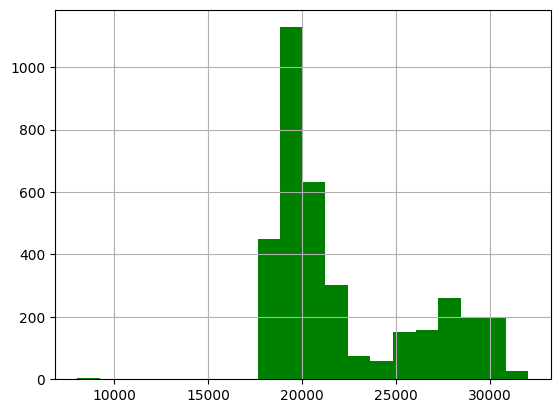

In [ ]:
# ราคาทอง

df['Gold_price'].hist(bins = 20, color = 'green')

เว็บที่ใช้พวกเราเก็บข้อมูลราคาทอง : https://www.sanook.com/money/goldrate/?fbclid=IwAR1yWixC2FhVeXh-qx0MWs2OVDdJVGNolKRm3XJtn6NGPw19iDrTF0kq_Xw

In [ ]:
# เช็คความผิดปกติ ex. วันที่ 7 มีคาคม พ.ศ. 2558

df.query("Gold_price < 16000")

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
794  2015-03-07      8050.0    1164.099976     111.860001           1.74   
795  2015-03-08      8050.0    1164.099976     111.860001           1.74   
1130 2016-02-06      9600.0    1157.800049     112.320000           1.79   
1131 2016-02-07      9600.0    1157.800049     112.320000           1.79   
2054 2018-08-18      8600.0    1176.500000     112.129997           1.71   
2055 2018-08-19      8600.0    1176.500000     112.129997           1.71   
2060 2018-08-24      8600.0    1206.300049     114.160004           1.69   

      RKbank      Crude    USD  
794     1.90  49.610001  32.57  
795     1.90  49.610001  32.57  
1130    1.45  30.889999  35.53  
1131    1.45  30.889999  35.53  
2054    1.45  65.910004  33.17  
2055    1.45  65.910004  33.17  
2060    1.45  68.720001  32.62

In [ ]:
# เปลี่ยนเป็น data ที่ถูกต้อง

df.loc[df['Gold_price'] < 16000, 'Gold_price'] += 10000

In [ ]:
df.query("Gold_price < 16000")

Empty DataFrame
Columns: [Date, Gold_price, G_Sgold_price, A_Sgold_price, T_Sgold_price, RKbank, Crude, USD]
Index: []

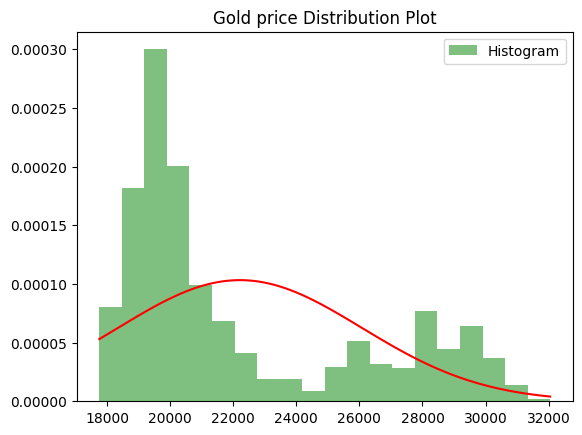

In [ ]:
# distribution ราคาทองคำ

plt.hist(df['Gold_price'], bins=20, density=True, alpha=0.5, color='green', label='Histogram')

kde = norm.pdf(np.linspace(min(df['Gold_price']), max(df['Gold_price']), 100), loc=np.mean(df['Gold_price']), scale=np.std(df['Gold_price']))
plt.plot(np.linspace(min(df['Gold_price']), max(df['Gold_price']), 100), kde, color='red')

plt.title('Gold price Distribution Plot')

plt.legend()

plt.show()

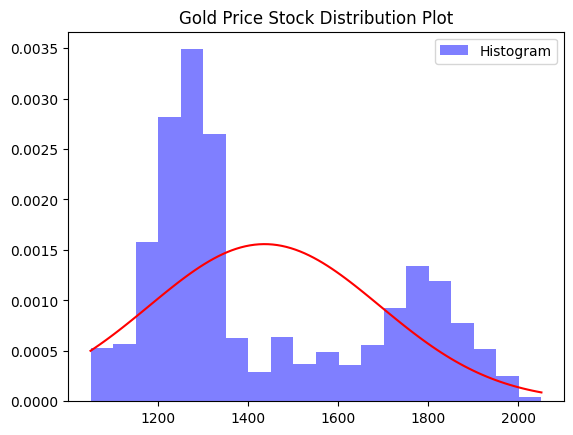

In [ ]:
# distridution หุ้นทองคำ

plt.hist(df['G_Sgold_price'], bins=20, density=True, alpha=0.5, color='blue', label='Histogram')

kde = norm.pdf(np.linspace(min(df['G_Sgold_price']), max(df['G_Sgold_price']), 100), loc=np.mean(df['G_Sgold_price']), scale=np.std(df['G_Sgold_price']))
plt.plot(np.linspace(min(df['G_Sgold_price']), max(df['G_Sgold_price']), 100), kde, color='red')

plt.title('Gold Price Stock Distribution Plot')
plt.legend()

plt.show()

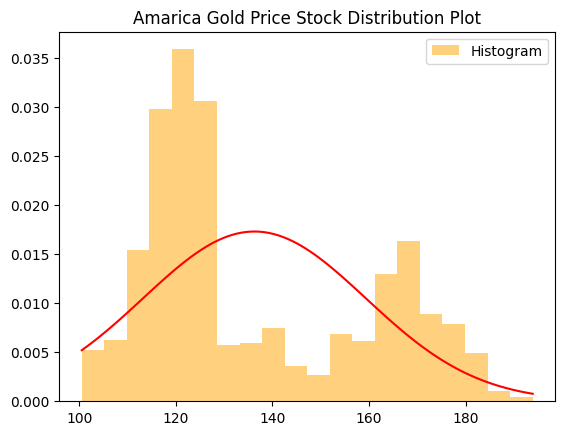

In [ ]:
# distridution หุ้นกองทุนทองคำต่างประเทศ

plt.hist(df['A_Sgold_price'], bins=20, density=True, alpha=0.5, color='orange', label='Histogram')

kde = norm.pdf(np.linspace(min(df['A_Sgold_price']), max(df['A_Sgold_price']), 100), loc=np.mean(df['A_Sgold_price']), scale=np.std(df['A_Sgold_price']))
plt.plot(np.linspace(min(df['A_Sgold_price']), max(df['A_Sgold_price']), 100), kde, color='red')

plt.title('Amarica Gold Price Stock Distribution Plot')
plt.legend()

plt.show()

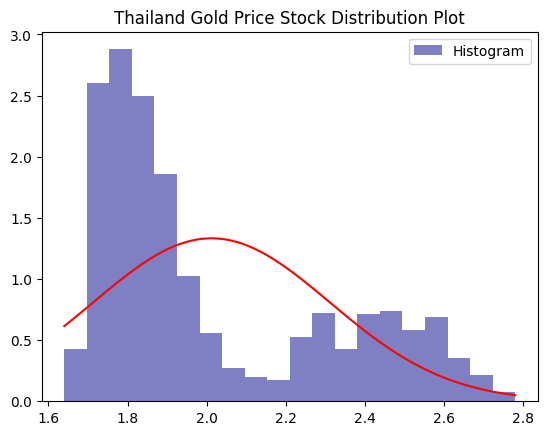

In [ ]:
# distridution หุ้นกองทุนทองคำประเทศไทย

plt.hist(df['T_Sgold_price'], bins=20, density=True, alpha=0.5, color='darkblue', label='Histogram')

kde = norm.pdf(np.linspace(min(df['T_Sgold_price']), max(df['T_Sgold_price']), 100), loc=np.mean(df['T_Sgold_price']), scale=np.std(df['T_Sgold_price']))
plt.plot(np.linspace(min(df['T_Sgold_price']), max(df['T_Sgold_price']), 100), kde, color='red')

plt.title('Thailand Gold Price Stock Distribution Plot')
plt.legend()

plt.show()

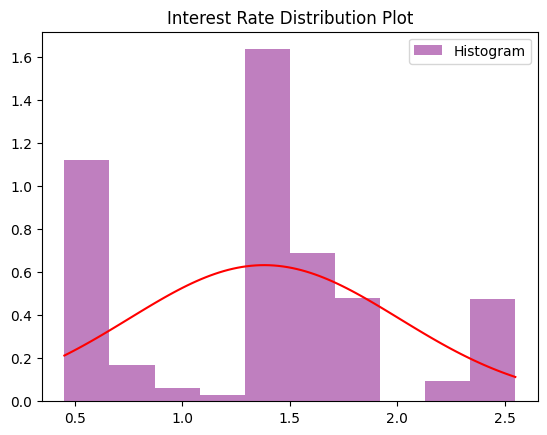

In [ ]:
# distridution อัตราดอกเบี้ยธนาคารกสิกรไทย

plt.hist(df['RKbank'], bins=10, density=True, alpha=0.5, color='purple', label='Histogram')

kde = norm.pdf(np.linspace(min(df['RKbank']), max(df['RKbank']), 100), loc=np.mean(df['RKbank']), scale=np.std(df['RKbank']))
plt.plot(np.linspace(min(df['RKbank']), max(df['RKbank']), 100), kde, color='red')

plt.title('Interest Rate Distribution Plot')
plt.legend()

plt.show()

<Axes: >

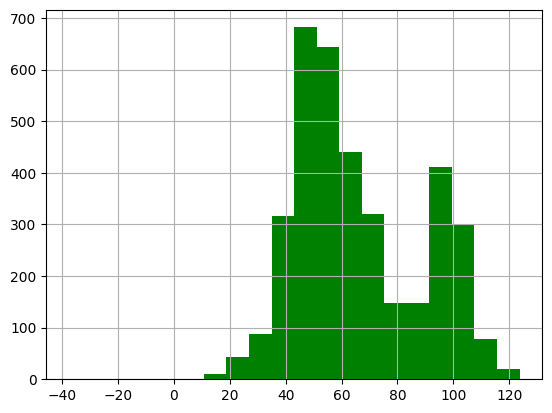

In [ ]:
# distridution ราคาน้ำมันดิบ

df['Crude'].hist(bins = 20, color = 'green')

In [ ]:
df.query("Crude < 0")

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
2665 2020-04-20     25600.0    1701.599976     159.699997           2.28   

      RKbank      Crude   USD  
2665    0.75 -37.630001  32.5

กราฟน้ำมันดิบ :

In [ ]:
# เช็คราคาจริงในวันที่ 20 เมษายน พ.ศ.2563  ==> 18.10

df['Crude'][2665] = 18.10

<ipython-input-284-e272bc6eb54c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crude'][2665] = 18.10


In [ ]:
df['Crude'][2665]

18.1

In [ ]:
df.query("Crude < 0")

Empty DataFrame
Columns: [Date, Gold_price, G_Sgold_price, A_Sgold_price, T_Sgold_price, RKbank, Crude, USD]
Index: []

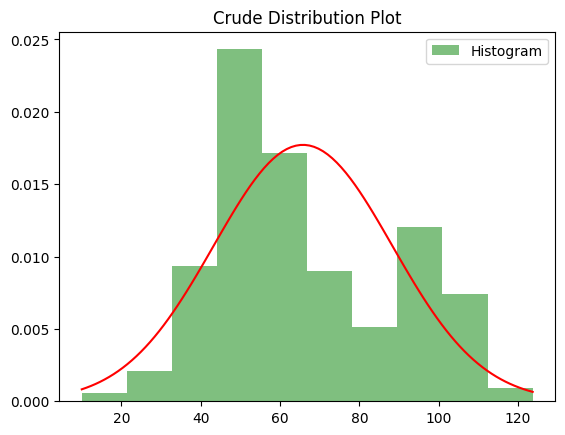

In [ ]:
# distridution หุ้นน้ำมันดิบ

plt.hist(df['Crude'], bins=10, density=True, alpha=0.5, color='green', label='Histogram')

kde = norm.pdf(np.linspace(min(df['Crude']), max(df['Crude']), 100), loc=np.mean(df['Crude']), scale=np.std(df['Crude']))
plt.plot(np.linspace(min(df['Crude']), max(df['Crude']), 100), kde, color='red')

plt.title('Crude Distribution Plot')
plt.legend()

plt.show()

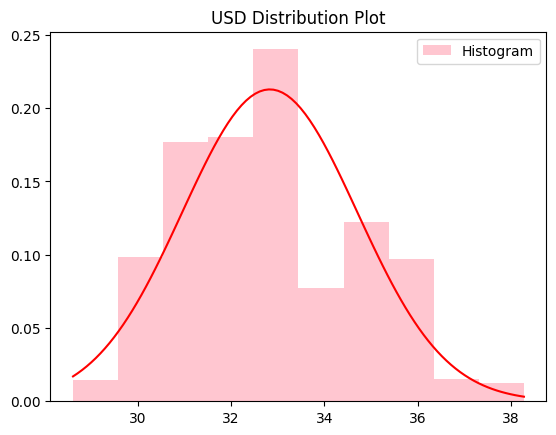

In [ ]:
# distridution ค่าเงินดอลลาร์

plt.hist(df['USD'], bins=10, density=True, alpha=0.9, color='pink', label='Histogram')

kde = norm.pdf(np.linspace(min(df['USD']), max(df['USD']), 100), loc=np.mean(df['USD']), scale=np.std(df['USD']))
plt.plot(np.linspace(min(df['USD']), max(df['USD']), 100), kde, color='red')

plt.title('USD Distribution Plot')
plt.legend()

plt.show()

## 2.4 ทำการสำรวจลักษณะของข้อมูลของกลุ่มประชากรย่อย (Group Properties)

ดูความสัมพันธ์คร่าวๆของประชากรย่อย

คำถาม : ราคาทอง และ หุ้นทองคือสิ่งเดียวกันมั้ย ถ้าต่างกัน ต่างมากมั้ย

### Line chart

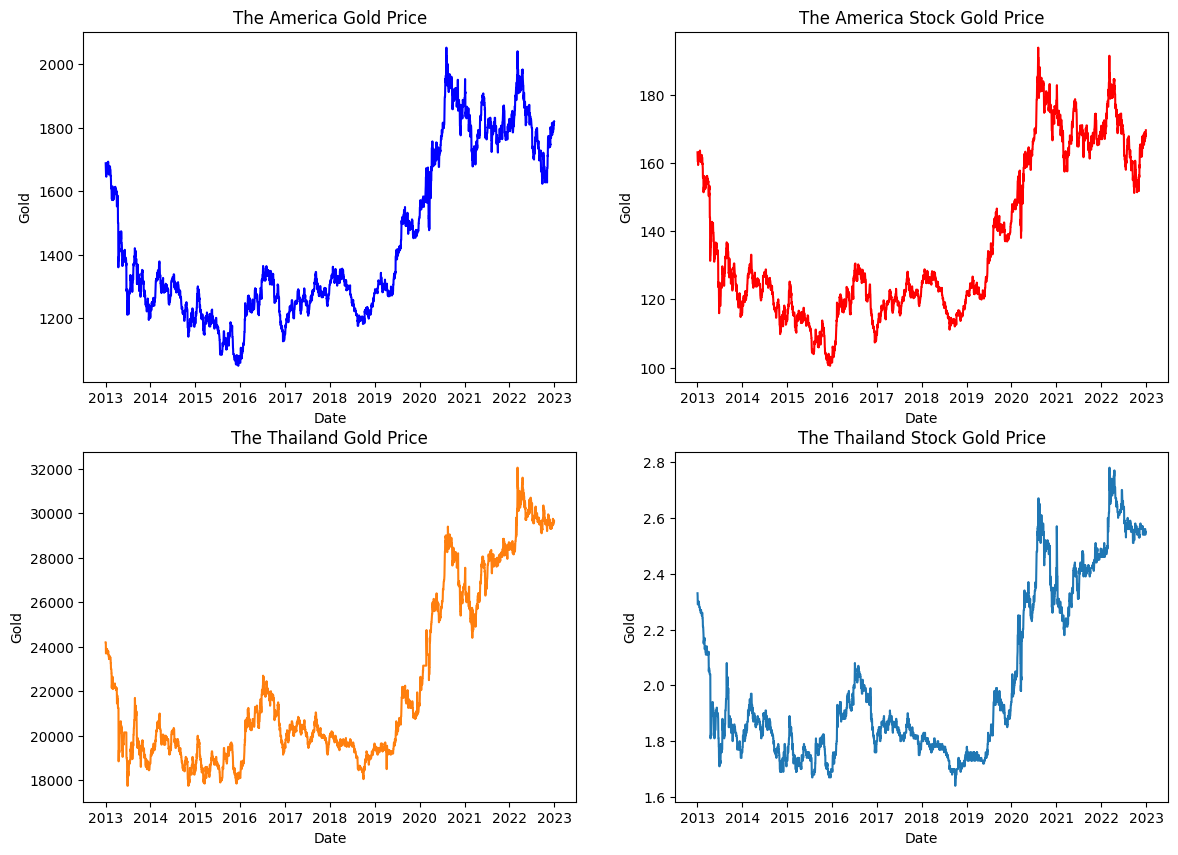

In [ ]:
# Line chart ของทองต่างๆ

plt.figure(figsize = (14, 10))

# หุ้นทอง
plt.subplot(2, 2, 1)
plt.xlabel('Date')
plt.ylabel('Gold')
plt.title('The America Gold Price')
plt.plot(df['Date'], df['G_Sgold_price'],'b-')

# หุ้นกองทุนทองต่างประเทศ
plt.subplot(2, 2, 2)
plt.xlabel('Date')
plt.ylabel('Gold')
plt.title('The America Stock Gold Price')
plt.plot(df['Date'], df['A_Sgold_price'],'r-')

# ทอง
plt.subplot(2, 2, 3)
plt.xlabel('Date')
plt.ylabel('Gold')
plt.title('The Thailand Gold Price')
plt.plot(df['Date'], df['Gold_price'],'-', color = '#ff7f0e')

# หุ้นกองทุนทองประเทศไทย
plt.subplot(2, 2, 4)
plt.xlabel('Date')
plt.ylabel('Gold')
plt.title('The Thailand Stock Gold Price')
plt.plot(df['Date'], df['T_Sgold_price'],'-', color = '#1f77b4')

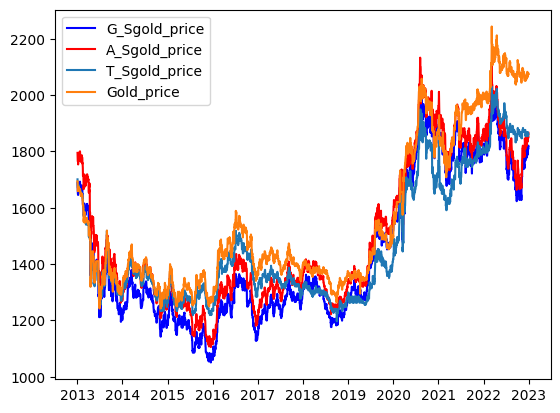

In [ ]:
# ลอง plot รวมกันโดยประมาณค่า y ให้ใกล้เคียงกัน

scale1 = 11
scale2 = 730
scale3 = 0.07

plt.plot(df['Date'], df['G_Sgold_price'], 'b-', label = 'G_Sgold_price')
plt.plot(df['Date'], df['A_Sgold_price']*scale1, 'r-', label = 'A_Sgold_price')
plt.plot(df['Date'], df['T_Sgold_price']*scale2, '-', color = '#1f77b4', label = 'T_Sgold_price')
plt.plot(df['Date'], df['Gold_price']*scale3,'-', color = '#ff7f0e', label = 'Gold_price')

plt.legend()

#### ทองและปัจจัยที่มีผลต่อราคาทอง

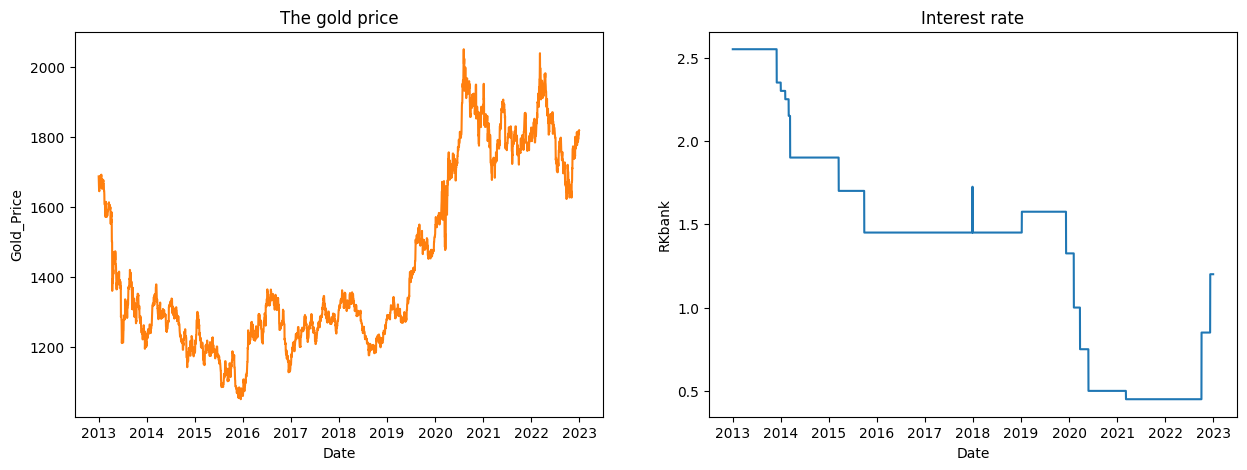

In [ ]:
# อัตราดอกเบี้ย vs ทอง

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.xlabel('Date')
plt.ylabel('Gold_Price')
plt.title('The gold price')
plt.plot(df['Date'], df['G_Sgold_price'], '-', color = '#ff7f0e')

plt.subplot(1,2,2)
plt.xlabel('Date')
plt.ylabel('RKbank')
plt.title('Interest rate')
plt.plot(df['Date'], df['RKbank'], '-', color = '#1f77b4')

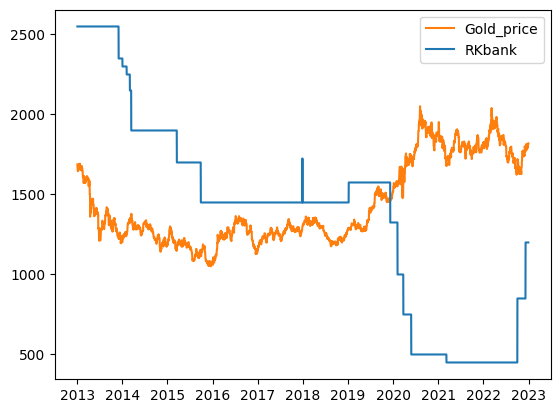

In [ ]:
scale = 1000

plt.plot(df['Date'], df['G_Sgold_price'], '-', color = '#ff7f0e', label = 'Gold_price')
plt.plot(df['Date'], df['RKbank'] * scale, '-', color = '#1f77b4', label = 'RKbank')
plt.legend()

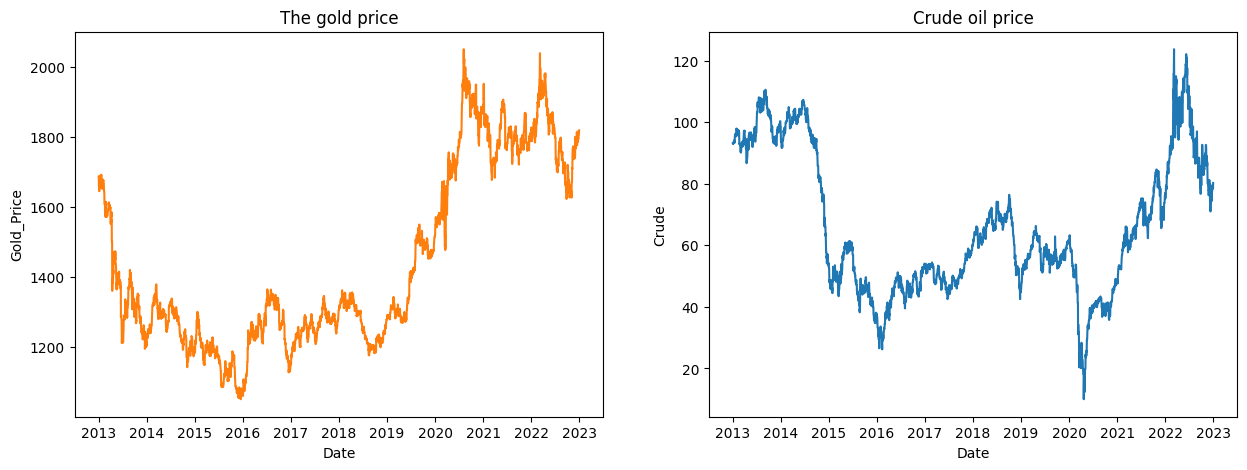

In [ ]:
# Crude vs gold

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.xlabel('Date')
plt.ylabel('Gold_Price')
plt.title('The gold price')
plt.plot(df['Date'], df['G_Sgold_price'], '-', color = '#ff7f0e')

plt.subplot(1,2,2)
plt.xlabel('Date')
plt.ylabel('Crude')
plt.title('Crude oil price')
plt.plot(df['Date'], df['Crude'], '-', color = '#1f77b4')

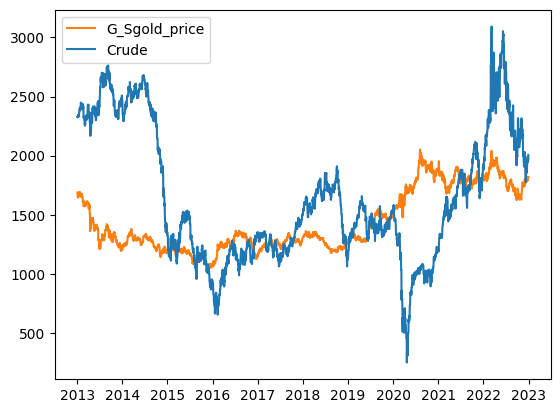

In [ ]:
scale = 25

plt.plot(df['Date'], df['G_Sgold_price'], '-', color = '#ff7f0e', label = 'G_Sgold_price')
plt.plot(df['Date'], df['Crude'] * scale, '-', color = '#1f77b4', label = 'Crude')

plt.legend()

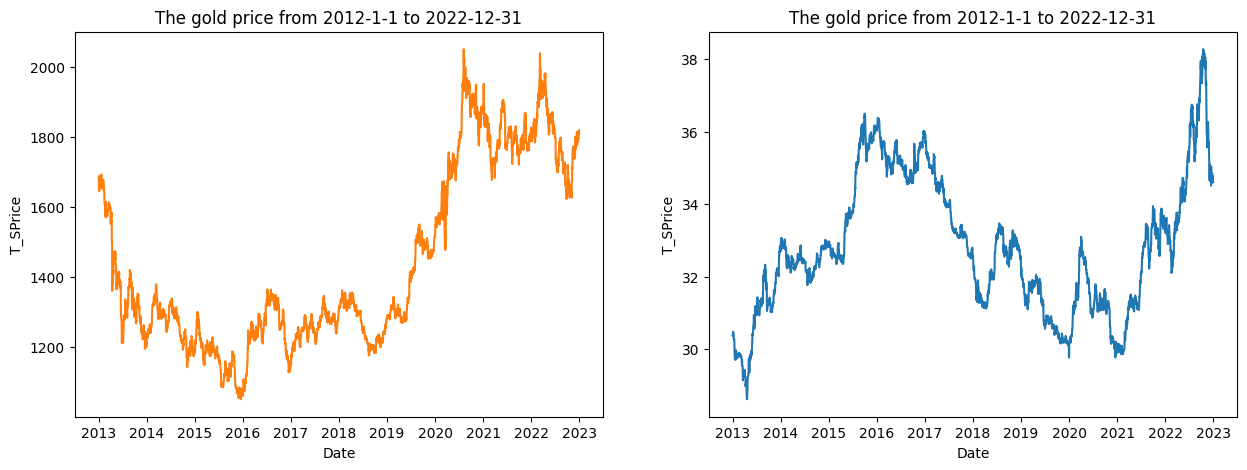

In [ ]:
# USD vs gold

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.xlabel('Date')
plt.ylabel('T_SPrice')
plt.title('The gold price from 2012-1-1 to 2022-12-31')
plt.plot(df['Date'], df['G_Sgold_price'], '-', color = '#ff7f0e')

plt.subplot(1,2,2)
plt.xlabel('Date')
plt.ylabel('T_SPrice')
plt.title('The gold price from 2012-1-1 to 2022-12-31')
plt.plot(df['Date'], df['USD'], '-', color = '#1f77b4')

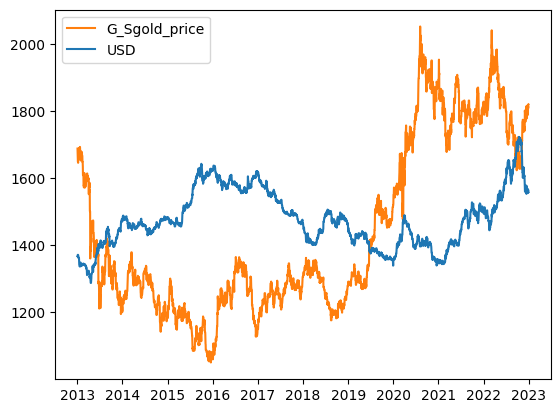

In [ ]:
scale = 45

plt.plot(df['Date'], df['G_Sgold_price'], '-', color = '#ff7f0e', label = 'G_Sgold_price')
plt.plot(df['Date'], df['USD'] * scale, '-', color = '#1f77b4', label = 'USD')

plt.legend()

### seaborn plot

Correlation : 0.9986211427210149


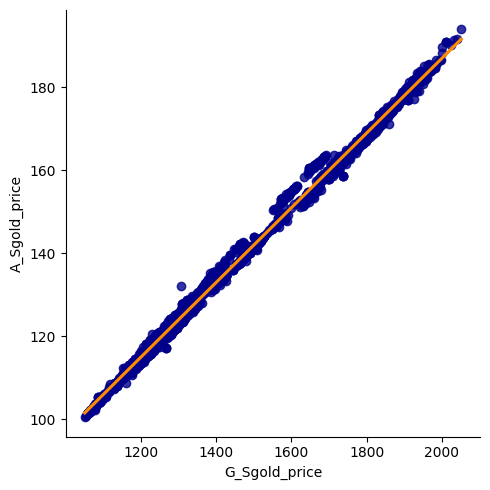

In [ ]:
# scatter plot

# หุ้นราคาทองต่างประเทศ vs หุ้นกองทุนทองของต่างประเทศ
sns.lmplot(x = 'G_Sgold_price', y = 'A_Sgold_price', data = df, scatter_kws = {'color' : 'darkblue'}, line_kws = {'color' : 'darkorange'})

# pearson Correlation
print("Correlation :", df['G_Sgold_price'].corr(df['A_Sgold_price']))

Correlation : 0.9388041316823251


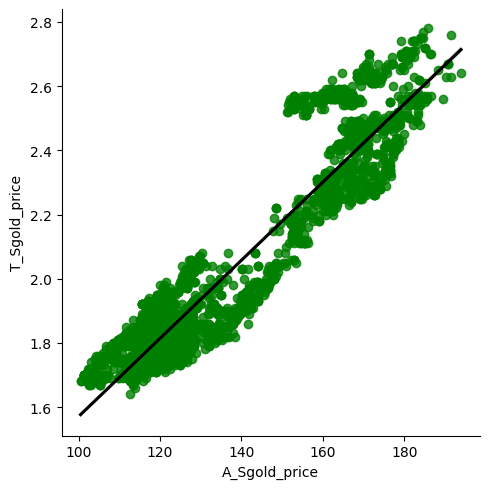

In [ ]:
# หุ้นกองทุนต่างประเทศ vs หุ้นกองทุนทองของประเทศไทย

sns.lmplot(x = 'A_Sgold_price', y = 'T_Sgold_price', data = df, scatter_kws = {'color' : 'green'}, line_kws = {'color' : 'black'})

print("Correlation :", df['A_Sgold_price'].corr(df['T_Sgold_price']))

Score : 0.9906958724173065


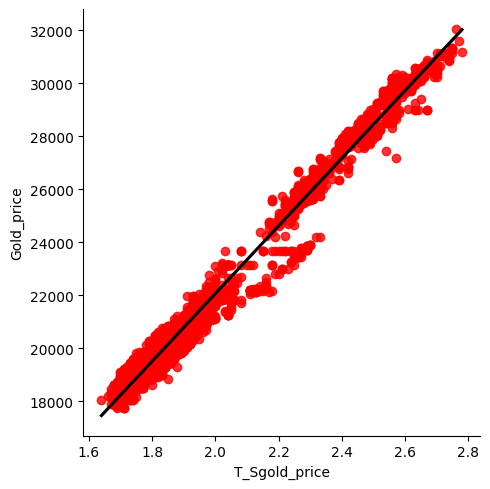

In [ ]:
# หุ้นกองทุนทองประเทศไทย vs ทองประเทศไทย
sns.lmplot(x = 'T_Sgold_price', y = 'Gold_price', data = df, scatter_kws = {'color' : 'red'}, line_kws = {'color' : 'black'})

print("Score :", df['Gold_price'].corr(df['T_Sgold_price']))

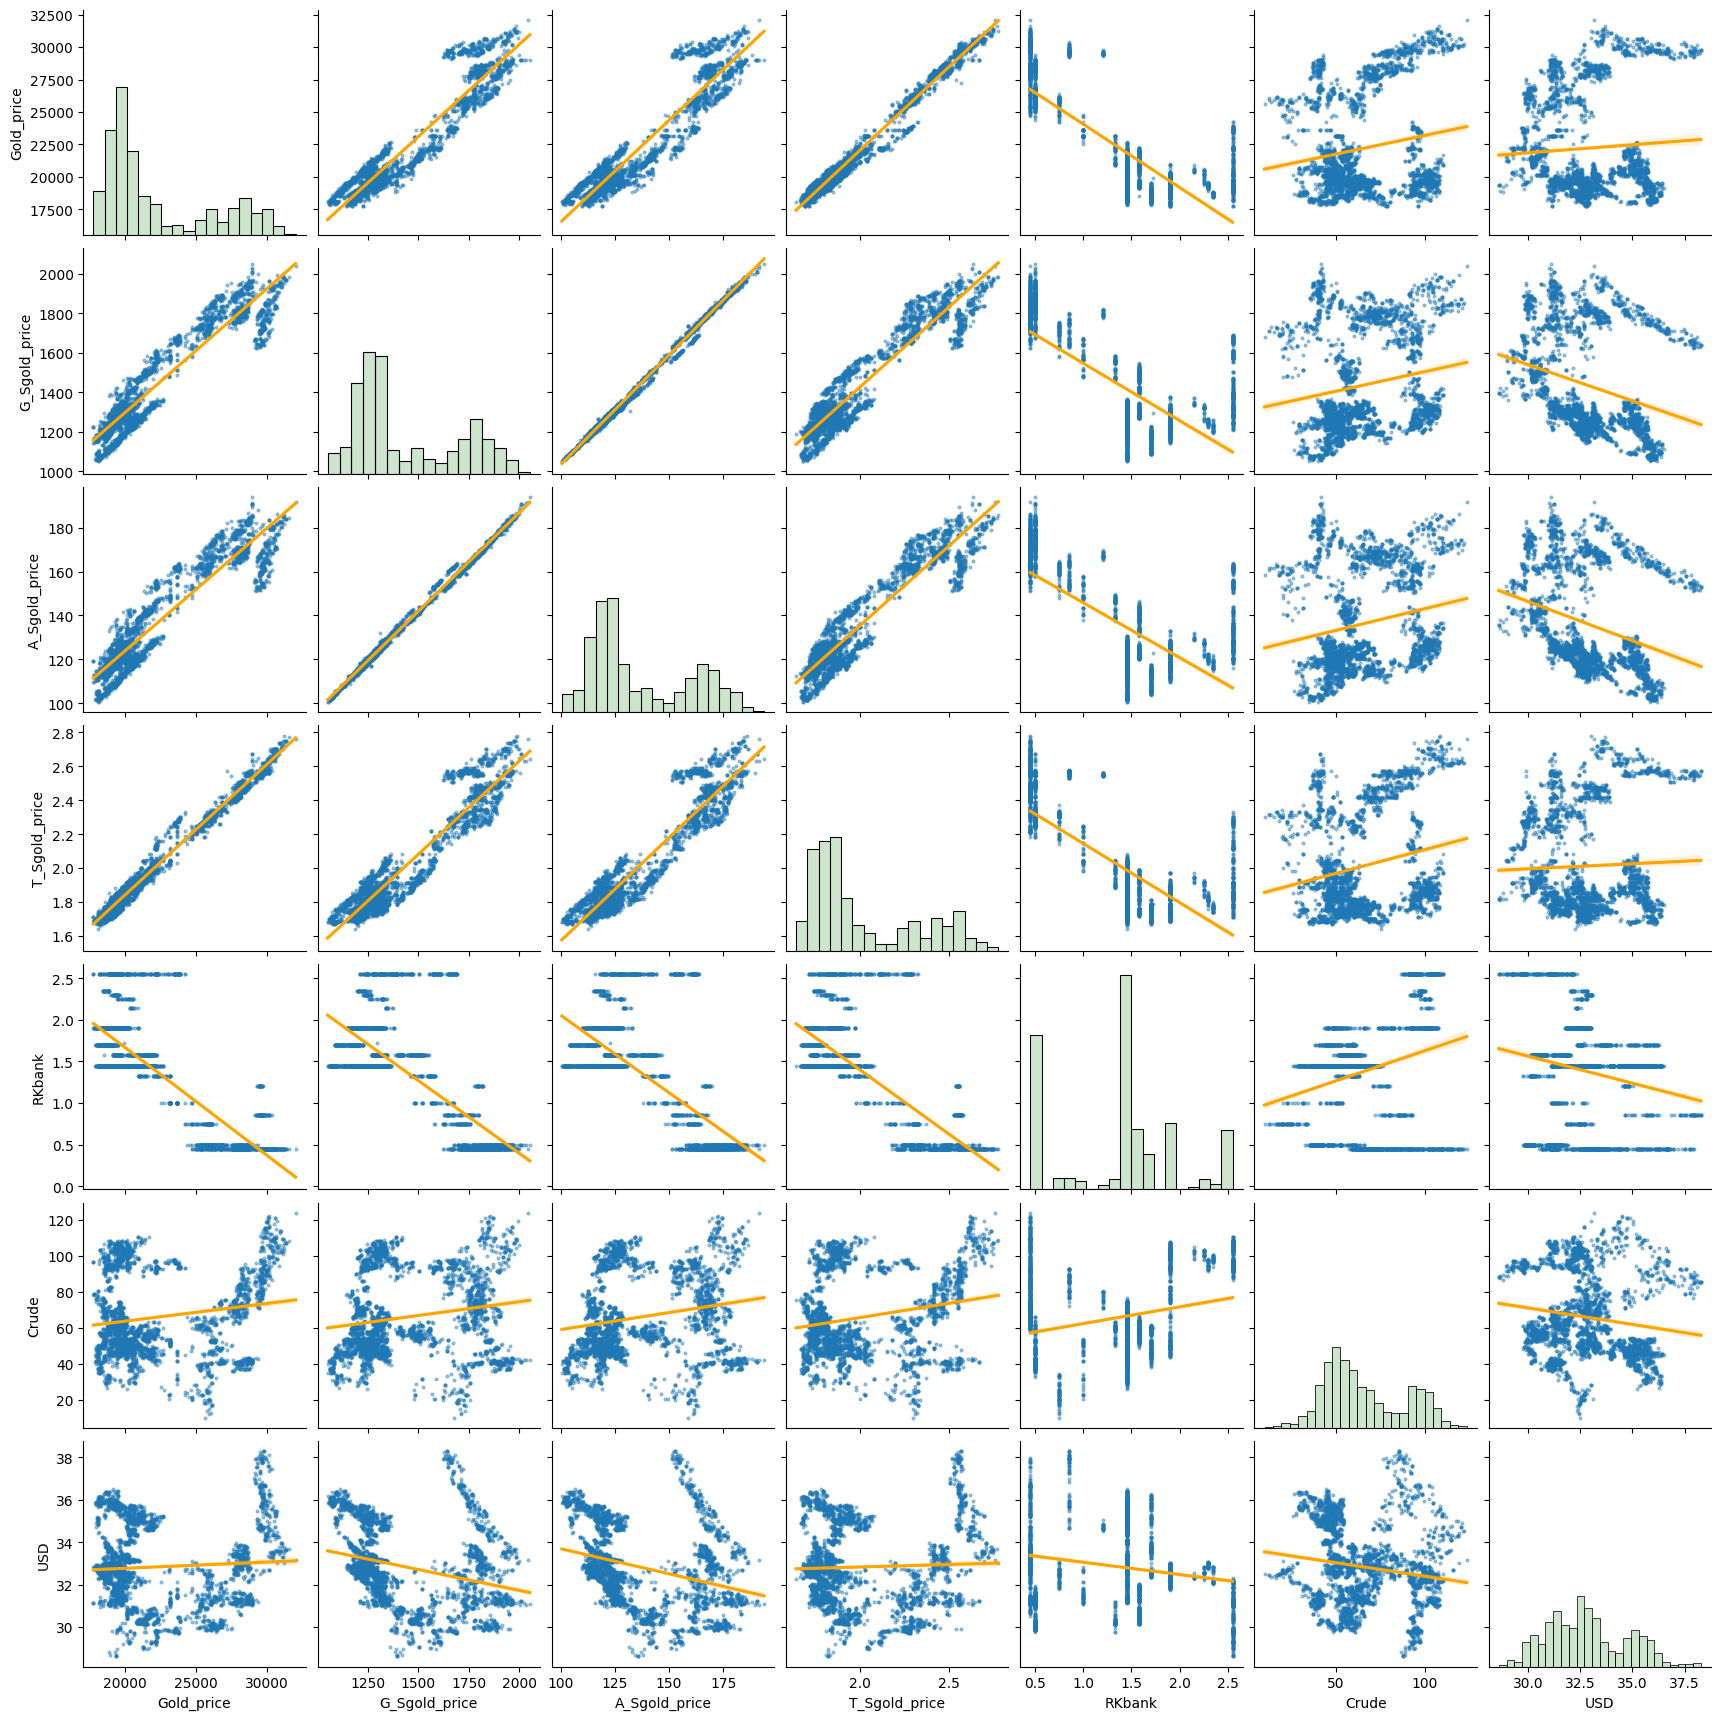

In [ ]:
# pairplot
sns.pairplot(df,
             kind = 'reg',
             plot_kws={'scatter_kws' : {'alpha' : 0.4, 's' : 4},
                       'line_kws' : {'color' : 'orange'}},
             diag_kws = {'color' : 'green', 'alpha' : .2})

<ipython-input-301-aae52fc86b4a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


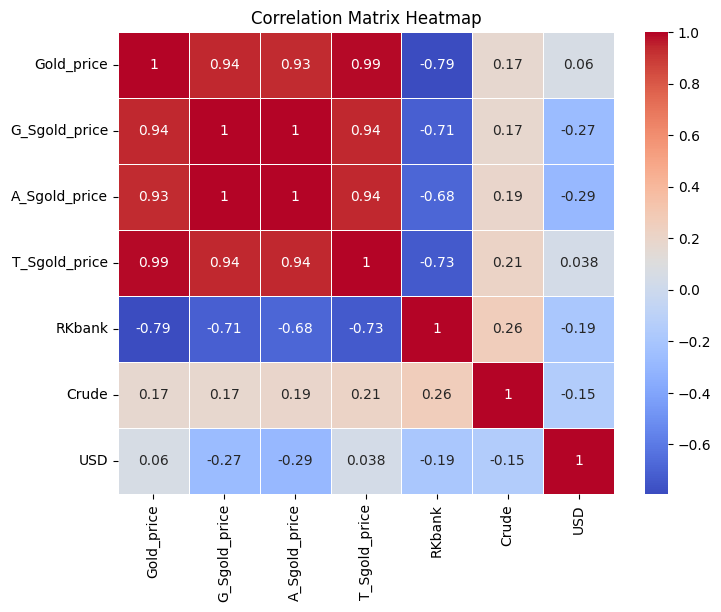

In [ ]:
# Correlation Matrix of Numerical Columns

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

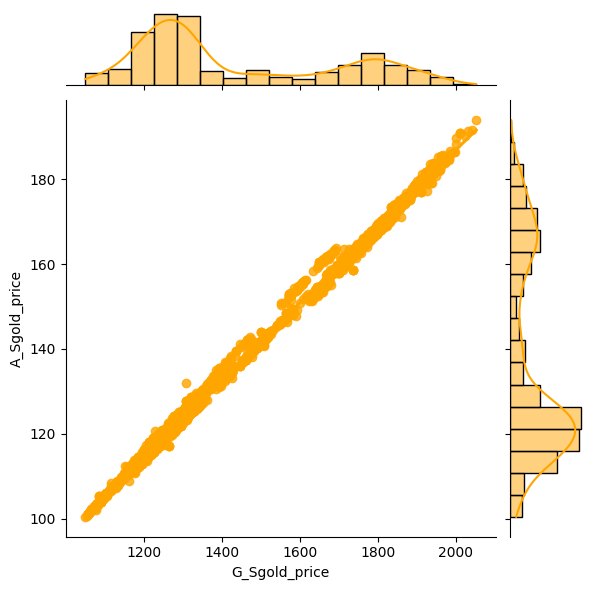

In [ ]:
# jointplot

sns.jointplot(x = 'G_Sgold_price', y = 'A_Sgold_price', data = df, kind = 'reg', ci = None, color = 'orange')

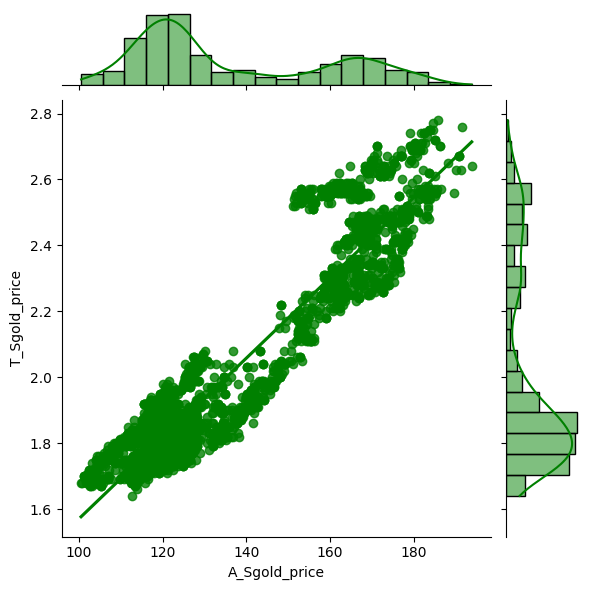

In [ ]:
sns.jointplot(x = 'A_Sgold_price', y = 'T_Sgold_price', data = df, kind = 'reg', ci = None, color = 'green')


# 3. Model the Data

ตัวแปรต้น คือ อัตราดอกเบี้ย ราคาน้ำมัน ค่าเงินดอลลาร์

ตัวแปรตาม คือ ราคาทอง

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline, Pipeline
# from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer, accuracy_score

# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 3.1 simple linear regression (random)

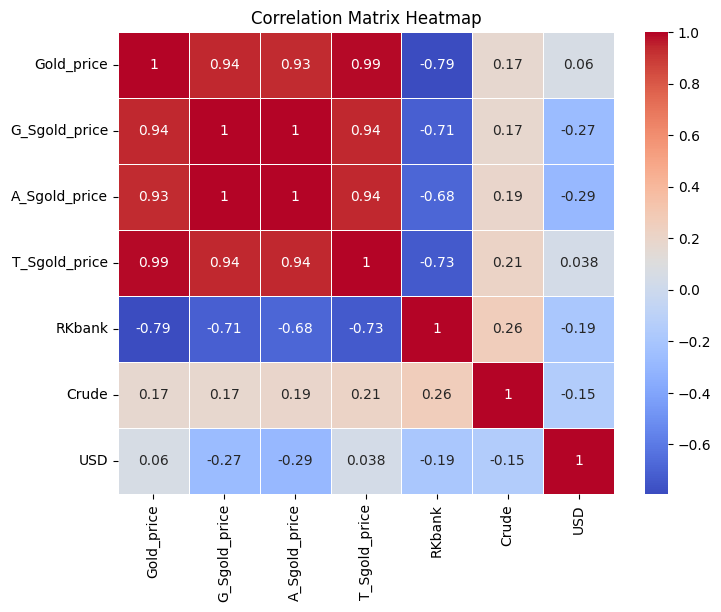

In [ ]:
# เลือกปัจจัยที่มีความสัมพันธ์มากที่สุด

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# แบ่งข้อมูลเป็นสองส่วนใหญ่ๆ คือ Training_set และ Test_set ด้วยสอัตราส่วน 80 : 20

random_state = 65338
training_set, test_set = train_test_split(df, train_size = 0.8, random_state = random_state)

In [ ]:
print('size of traning_set : ', len(training_set))
print('size of test_set    : ', len(test_set))

size of traning_set :  2920
size of test_set    :  730


In [ ]:
# แบ่ง training_set ออกเป็นอีกสองส่วน คือ Training_set และ Validation_set ดัวยอัตราส่วน 80:20

training_set, validation_set = train_test_split(training_set, train_size = 0.8, random_state = 65338)

In [ ]:
print('size of traning_set    : ', len(training_set))
print('size of validation_set : ', len(validation_set))

size of traning_set    :  2336
size of validation_set :  584


In [ ]:
sim_model = LinearRegression()
sim_model

LinearRegression()

In [ ]:
training_set.head(3)

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
1992 2018-06-17     19700.0    1274.599976     121.339996           1.79   
1552 2017-04-03     20200.0    1250.800049     119.349998           1.84   
1155 2016-03-02     20650.0    1241.099976     118.680000           1.90   

      RKbank      Crude    USD  
1992    1.45  65.059998  32.67  
1552    1.45  50.240002  34.37  
1155    1.45  34.660000  35.53

In [ ]:
X_train = training_set[['RKbank']] # daraframe
Y_train = training_set['Gold_price'] # series

X_valid = validation_set[['RKbank']]
Y_valid = validation_set['Gold_price']

X_test = test_set[['RKbank']]
Y_test = test_set['Gold_price']

In [ ]:
# creat model

sim_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# R2

sim_model.score(X_train, Y_train)

0.6298313656482438

In [ ]:

sim_model.intercept_

28944.09489573102

In [ ]:
sim_model.coef_

array([-4887.53156939])

In [ ]:
# predict y
# y = mx + c
#                             m                    c
print('nonmedthord : ', (sim_model.coef_) * 0.5 + sim_model.intercept_)

print('medthord    : ', sim_model.predict([[0.5]]))

nonmedthord :  [26500.32911104]
medthord    :  [26500.32911104]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# สามารถปรับค่า random_state จนกว่าจะพอใจได้

sim_model.score(X_valid, Y_valid)

0.5866640865884463

In [ ]:
# test จริง

data_test = sim_model.predict(X_test)
simscore = sim_model.score(X_test, Y_test)
simscore

0.6596043699984426

In [ ]:
simple_linear = pd.DataFrame()

In [ ]:
simple_linear['RKbank'] = X_test
simple_linear['Gold_price'] = Y_test
simple_linear['predicted'] = data_test

In [ ]:
simple_linear.tail()

RKbank  Gold_price     predicted
1124    1.45     18800.0  21857.174120
682     1.90     17900.0  19657.784914
3416    0.45     30250.0  26744.705690
3376    0.45     30400.0  26744.705690
871     1.70     19050.0  20635.291228

## 3.2 simple linear regression (degree มากกว่า 1)

In [ ]:
df.head(3)

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  RKbank  \
0 2013-01-02     24200.0    1687.900024     163.169998           2.33    2.55   
1 2013-01-03     24200.0    1673.699951     161.199997           2.32    2.55   
2 2013-01-04     23700.0    1648.099976     160.440002           2.29    2.55   

       Crude     USD  
0  93.120003  30.370  
1  92.919998  30.360  
2  93.089996  30.475

In [ ]:
# เลือกตัวแปรต้นที่มีค่า correlation มากที่สุด

df['RKbank'].head()

0    2.55
1    2.55
2    2.55
3    2.55
4    2.55
Name: RKbank, dtype: float64

In [ ]:
# split data  >>> training_set, validation_set, test_set

random_state = 1234

training_set, test_set = train_test_split(df, train_size = 0.8, random_state = random_state)
training_set, validation_set = train_test_split(training_set, train_size = 0.8, random_state = random_state)

# degree

# degrees = np.arange(1, 11)
#   # Test error (formerly MSE)

In [ ]:
x_train = training_set['RKbank']
y_train = training_set['Gold_price']

x_valid = validation_set['RKbank']
y_valid = validation_set['Gold_price']

x_test = test_set['RKbank']
y_test = test_set['Gold_price']

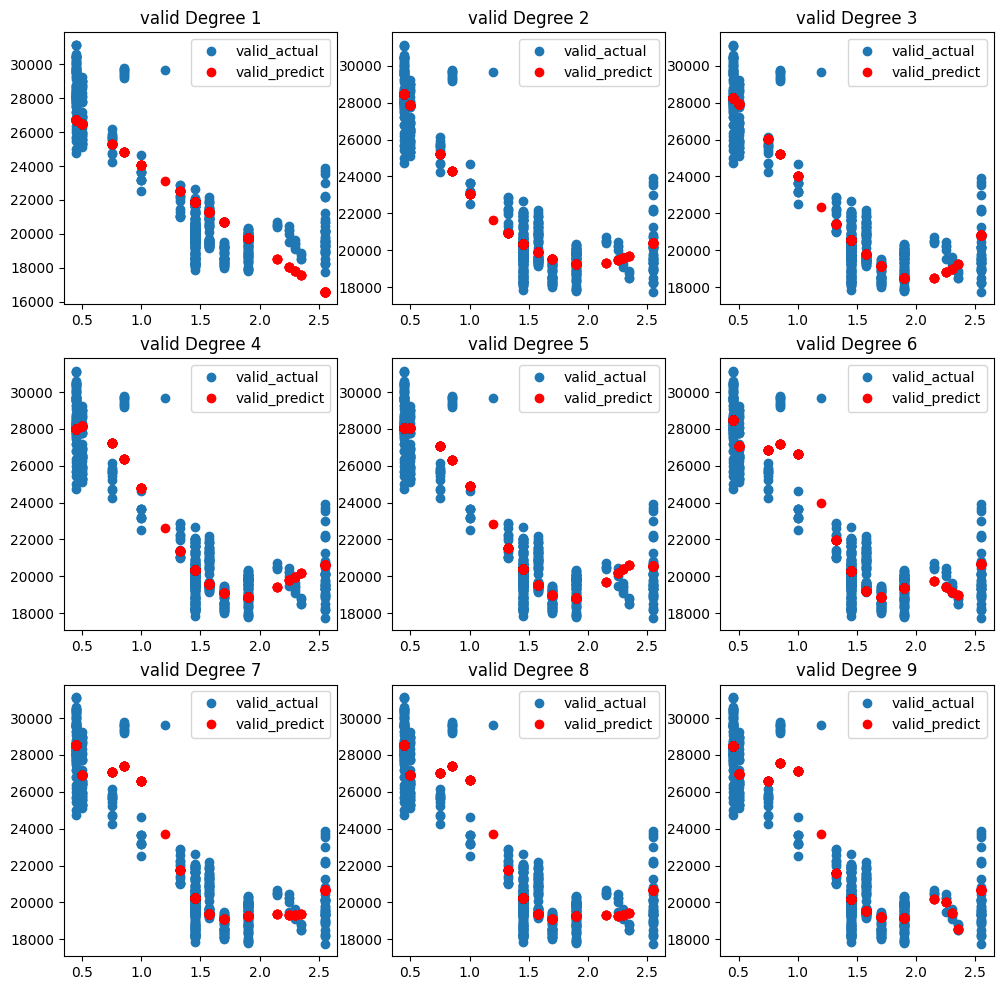

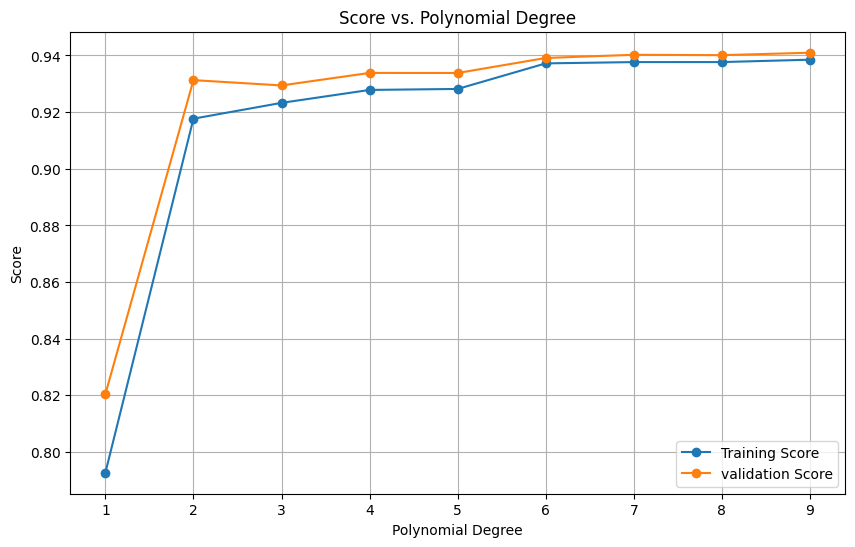

Best Polynomial Degree: 9
Best Score: 0.9409435940322409
Best Polunomial:            9             8             7             6             5
7.995e+04 x - 1.044e+06 x + 5.863e+06 x - 1.848e+07 x + 3.583e+07 x
              4             3             2
 - 4.395e+07 x + 3.378e+07 x - 1.552e+07 x + 3.821e+06 x - 3.525e+05


In [ ]:
degree_range = range(1, 10) # test degree ตั่งแต่ 1-9

corr_scores = [] # เก็บ score
best_score = -1   # เก็บ score ที่ดีที่สุด
best_valid = -1
best_degree = 0  # เก็บ degree ที่ score เยอะที่สุด

valid_score = []

x_train = np.array(x_train)

plt.figure(figsize = (12, 12))

for degree in degree_range:
  # creat polynomial
  coefficients = np.polyfit(x_train, y_train, degree)
  # [2,3,4]  poly1d ==> 2x**2 + 3x + 4
  poly = np.poly1d(coefficients)

  # Predict train -> y_train
  y_train_pred = poly(x_train)
  score = np.corrcoef(y_train, y_train_pred)[0, 1]
  corr_scores.append(score)

  # Predict valid -> y_valid
  y_valid_pred = poly(x_valid)
  valid = np.corrcoef(y_valid, y_valid_pred)[0, 1]
  valid_score.append(valid)

  plt.subplot(3, 3, degree)
  plt.plot(x_valid, y_valid, 'o', label='valid_actual')
  plt.plot(x_valid, y_valid_pred, 'ro', label='valid_predict')
  plt.title(f"valid Degree {degree}")
  plt.legend()

  if valid > best_valid:
    best_valid = valid
    best_degree = degree
    best_poly = poly

  if score > best_score:
    best_score = score


 # Plot R-squared scores against degrees
plt.figure(figsize=(10, 6))
plt.plot(degree_range, corr_scores, marker='o', label='Training Score')
plt.plot(degree_range, valid_score, marker='o', label='validation Score')

plt.title("Score vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Score")
plt.grid(True)
plt.legend()

plt.show()

print("Best Polynomial Degree:", best_degree)
print("Best Score:", best_valid)
print("Best Polunomial:", poly)

In [ ]:
# เนื่องจากเป็นการ random และข้อมูลมีจำนวนมากๆ จึงทำให้ pattern ค่อนข้างคล้ายกัน และ degree ไม่มากพอที่ทำให้ validation score เกิดการ over fit
# เลือก degree = 9 มา test

print(poly)

           9             8             7             6             5
7.995e+04 x - 1.044e+06 x + 5.863e+06 x - 1.848e+07 x + 3.583e+07 x
              4             3             2
 - 4.395e+07 x + 3.378e+07 x - 1.552e+07 x + 3.821e+06 x - 3.525e+05


In [ ]:
y_test_pred = poly(x_test)

In [ ]:
polyscore = np.corrcoef(y_test, y_test_pred)[0, 1]
polyscore

0.9367761696533441

In [ ]:
poly_simple_regression = pd.DataFrame()
poly_simple_regression['RKbank'] = x_test
poly_simple_regression['Gold_price'] = y_test
poly_simple_regression['predicted'] = y_test_pred

In [ ]:
poly_simple_regression

RKbank  Gold_price     predicted
201     2.55     19200.0  20670.314932
481     1.90     19800.0  19151.573297
2707    0.50     25950.0  26980.741649
822     1.70     18400.0  19208.946175
25      2.55     23600.0  20670.314932
...      ...         ...           ...
3368    0.45     30950.0  28502.771226
1863    1.45     19700.0  20211.719795
190     2.55     18800.0  20670.314932
3481    0.45     29550.0  28502.771226
2722    0.50     25350.0  26980.741649

[730 rows x 3 columns]

## 3.3 multiple linear regression (random)

In [ ]:
# แบ่งข้อมูลเป็นสองส่วนใหญ่ๆ คือ taining_set และ test_set

training_set, test_set = train_test_split(df, train_size = 0.8, random_state = 7)

In [ ]:
# เช็คขนาด
print('size of Training set : ', len(training_set))
print('size of Test_set', len(test_set))

size of Training set :  2920
size of Test_set 730


In [ ]:
x_train = training_set[['RKbank', 'Crude', 'USD']]
y_train = training_set['Gold_price']

x_test = test_set[['RKbank', 'Crude', 'USD']]
y_test = test_set['Gold_price']

In [ ]:
train, validation = train_test_split(training_set, train_size = 0.8, random_state = 7)

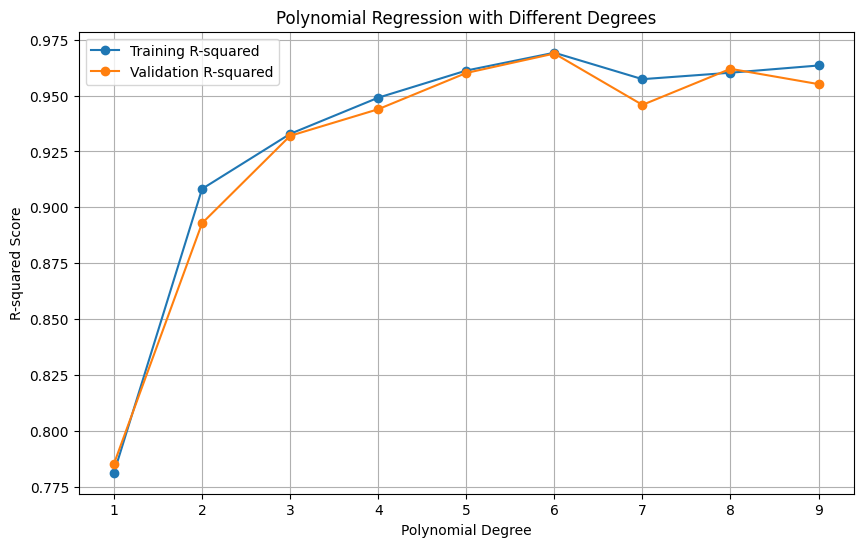

Best degree: 6
Best Score: 0.9688068352128247


In [ ]:
x_train = train[['RKbank', 'Crude', 'USD']]
y_train = train['Gold_price']

x_valid = validation[['RKbank', 'Crude', 'USD']]
y_valid = validation['Gold_price']

# defind range of degree
degrees = range(1, 10)

# เก็บ score
best_valid_score = -1
train_scores = []
valid_scores = []

for degree in degrees:

    # Create polynomial features

    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(x_train)
    X_valid_poly = poly_features.transform(x_valid)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # model.score
    # train_score = model.score(X_train_poly, y_train)
    # valid_score = model.score(X_valid_poly, y_valid)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_valid_pred = model.predict(X_valid_poly)

    # Calculate R-squared scores for training and testing data
    train_score = r2_score(y_train, y_train_pred)
    valid_score = r2_score(y_valid, y_valid_pred)

    # Append scores to the lists
    train_scores.append(train_score)
    valid_scores.append(valid_score)

    if valid_score > best_valid_score:
      best_model = model
      best_degree = degree
      best_valid_score = valid_score


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, label='Training R-squared', marker='o')
plt.plot(degrees, valid_scores, label='Validation R-squared', marker='o')
# plt.plot(degrees, train_scores, label='Training score', marker='o')
# plt.plot(degrees, valid_scores, label='Validation score', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared Score')
plt.title('Polynomial Regression with Different Degrees')
plt.legend()
plt.grid(True)
plt.show()

print("Best degree:", best_degree)
print("Best Score:", best_valid_score)

In [ ]:
# test จริง

poly_features = PolynomialFeatures(degree=best_degree)
X_test_poly = poly_features.fit_transform(x_test)

# predict >> y_test
y_test_pred = best_model.predict(X_test_poly)

# score
mulscore = r2_score(y_test, y_test_pred)
mulscore

0.9671077697593939

In [ ]:
multiple_regression = test_set[['RKbank', 'Crude', 'USD', 'Gold_price']].copy()

In [ ]:
multiple_regression['Predicted'] = y_test_pred

In [ ]:
multiple_regression

RKbank      Crude    USD  Gold_price     Predicted
3207    0.45  81.309998  33.16     28150.0  28281.930127
2090    1.45  70.779999  32.43     18400.0  19049.171696
2644    0.75  20.090000  32.66     24700.0  25187.100081
2141    1.45  55.689999  32.94     18700.0  19739.822825
3341    0.45  91.589996  32.45     28950.0  28865.066444
...      ...        ...    ...         ...           ...
2893    0.50  46.259998  30.21     26200.0  26563.221131
1903    1.45  63.400002  31.19     19350.0  20279.939617
612     1.90  93.290001  31.99     19150.0  19631.707130
1062    1.45  41.650002  35.80     17900.0  19587.651592
3302    0.45  83.820000  33.09     28450.0  28423.258144

[730 rows x 5 columns]

GridSearch

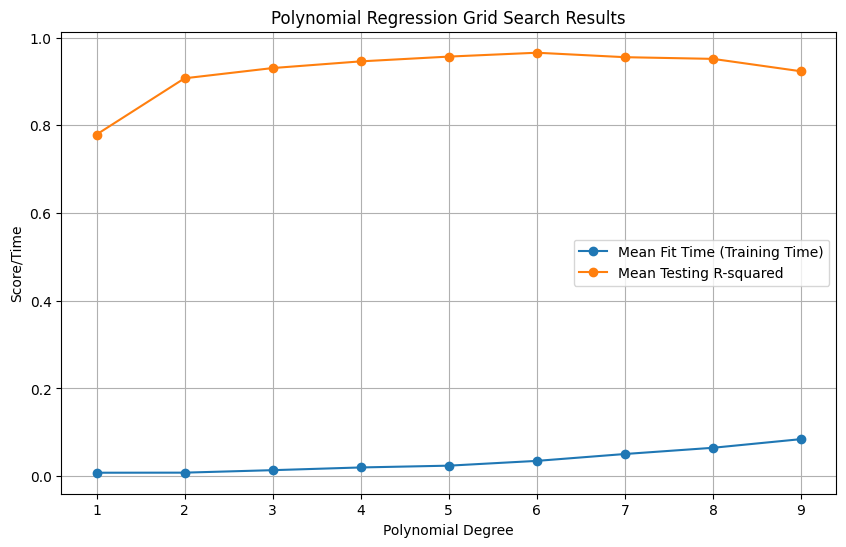

Best Polynomial Degree:  6
R-squared Score on Test Data: 0.97


In [ ]:
degrees = range(1, 10)

# Create a polynomial regression pipeline
poly_reg = PolynomialFeatures()
lin_reg = LinearRegression()
pipeline = Pipeline([("poly_features", poly_reg), ("linear_regression", lin_reg)])

# Define a range of polynomial degrees to explore
param_grid = {"poly_features__degree": degrees}

# Create a grid search object
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=make_scorer(r2_score),
    cv=5
)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# best degree
best_degree = grid_search.best_params_["poly_features__degree"]

# predict >> y_pred
y_pred = grid_search.predict(x_test)

# Calculate R-squared score
test_score = r2_score(y_test, y_pred)

# Extract mean_fit_time from grid search results (proxy for training time)
fit_times = grid_search.cv_results_["mean_fit_time"]
test_scores = grid_search.cv_results_["mean_test_score"]

# plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, fit_times, label='Mean Fit Time (Training Time)', marker='o')
plt.plot(degrees, test_scores, label='Mean Testing R-squared', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Score/Time')
plt.title('Polynomial Regression Grid Search Results')
plt.legend()
plt.grid(True)
plt.show()

print("Best Polynomial Degree: ", best_degree)
print("R-squared Score on Test Data: {:.2f}".format(test_score))

In [ ]:
# ได้ค่าเดียวกันกับวิธีก่อนหน้า
print(mulscore)

test_score

0.9671077697593939


0.9671077697593939

In [ ]:
multiple_regression['Predicted_gridsearch'] = y_pred

In [ ]:
multiple_regression

RKbank      Crude    USD  Gold_price     Predicted  Predicted_gridsearch
3207    0.45  81.309998  33.16     28150.0  28281.930127          28281.930127
2090    1.45  70.779999  32.43     18400.0  19049.171696          19049.171696
2644    0.75  20.090000  32.66     24700.0  25187.100081          25187.100081
2141    1.45  55.689999  32.94     18700.0  19739.822825          19739.822825
3341    0.45  91.589996  32.45     28950.0  28865.066444          28865.066444
...      ...        ...    ...         ...           ...                   ...
2893    0.50  46.259998  30.21     26200.0  26563.221131          26563.221131
1903    1.45  63.400002  31.19     19350.0  20279.939617          20279.939617
612     1.90  93.290001  31.99     19150.0  19631.707130          19631.707130
1062    1.45  41.650002  35.80     17900.0  19587.651592          19587.651592
3302    0.45  83.820000  33.09     28450.0  28423.258144          28423.258144

[730 rows x 6 columns]

## 3.4 multiple linear regression แบบไม่ random (split โดยคำนึงถึงช่วงเวลา)

In [ ]:
df

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
0    2013-01-02     24200.0    1687.900024     163.169998           2.33   
1    2013-01-03     24200.0    1673.699951     161.199997           2.32   
2    2013-01-04     23700.0    1648.099976     160.440002           2.29   
3    2013-01-05     23700.0    1648.099976     160.440002           2.29   
4    2013-01-06     23700.0    1648.099976     160.440002           2.29   
...         ...         ...            ...            ...            ...   
3645 2022-12-26     29550.0    1795.900024     167.259995           2.54   
3646 2022-12-27     29700.0    1814.800049     168.669998           2.55   
3647 2022-12-28     29600.0    1807.900024     167.910004           2.55   
3648 2022-12-29     29650.0    1819.500000     168.850006           2.55   
3649 2022-12-30     29650.0    1819.699951     169.639999           2.55   

      RKbank      Crude     USD  
0       2.55  93.120003  30.370  
1       2.55  92.919998  30.360  
2       2.55  93.089996  30.475  
3       2.55  93.089996  30.475  
4       2.55  93.089996  30.475  
...      ...        ...     ...  
3645    1.20  79.559998  34.690  
3646    1.20  79.529999  34.600  
3647    1.20  78.959999  34.780  
3648    1.20  78.400002  34.620  
3649    1.20  80.260002  34.610  

[3650 rows x 8 columns]

In [ ]:
# แบ่งข้อมูลออกเป็นสองส่วนใหญ่ๆ คือ training_set และ test_set ด้วยอัตรา 80 : 20

training_set, test_set = df[:int(0.8*(len(df)))], df[int(0.8*(len(df))):]

In [ ]:
# แบ่ง training_set เป็น training_set และ validation_set ด้วยอัตรา 80 : 20

training_set, validation_set = training_set[:int(0.8*(len(training_set)))], training_set[int(0.8*(len(training_set))):]

In [ ]:
print('len training_set:', len(training_set))
print('len validation_set:', len(validation_set))
print('len test_set:', len(test_set))

len training_set: 2336
len validation_set: 584
len test_set: 730


In [ ]:
training_set

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
0    2013-01-02     24200.0    1687.900024     163.169998           2.33   
1    2013-01-03     24200.0    1673.699951     161.199997           2.32   
2    2013-01-04     23700.0    1648.099976     160.440002           2.29   
3    2013-01-05     23700.0    1648.099976     160.440002           2.29   
4    2013-01-06     23700.0    1648.099976     160.440002           2.29   
...         ...         ...            ...            ...            ...   
2331 2019-05-22     19200.0    1273.599976     120.239998           1.72   
2332 2019-05-23     19200.0    1284.800049     121.169998           1.72   
2333 2019-05-24     19300.0    1283.000000     121.300003           1.73   
2334 2019-05-25     19300.0    1283.000000     121.300003           1.73   
2335 2019-05-26     19300.0    1283.000000     121.300003           1.73   

      RKbank      Crude     USD  
0      2.550  93.120003  30.370  
1      2.550  92.919998  30.360  
2      2.550  93.089996  30.475  
3      2.550  93.089996  30.475  
4      2.550  93.089996  30.475  
...      ...        ...     ...  
2331   1.575  61.419998  31.920  
2332   1.575  57.910000  31.910  
2333   1.575  58.630001  31.830  
2334   1.575  58.630001  31.830  
2335   1.575  58.630001  31.830  

[2336 rows x 8 columns]

In [ ]:
validation_set

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
2336 2019-05-27     19300.0    1283.000000     121.300003           1.73   
2337 2019-05-28     19250.0    1276.500000     120.830002           1.73   
2338 2019-05-29     19250.0    1280.599976     120.870003           1.73   
2339 2019-05-30     19200.0    1287.099976     121.690002           1.73   
2340 2019-05-31     19350.0    1305.800049     123.330002           1.74   
...         ...         ...            ...            ...            ...   
2915 2020-12-26     26650.0    1879.900024     176.350006           2.34   
2916 2020-12-27     26650.0    1879.900024     176.350006           2.34   
2917 2020-12-28     26800.0    1877.199951     175.710007           2.36   
2918 2020-12-29     26650.0    1879.699951     176.350006           2.36   
2919 2020-12-30     26600.0    1891.000000     177.699997           2.42   

      RKbank      Crude    USD  
2336   1.575  58.630001  31.83  
2337   1.575  59.139999  31.85  
2338   1.575  58.810001  31.82  
2339   1.575  56.590000  31.76  
2340   1.575  53.500000  31.52  
...      ...        ...    ...  
2915   0.500  48.230000  30.04  
2916   0.500  48.230000  30.04  
2917   0.500  47.619999  30.16  
2918   0.500  48.000000  30.05  
2919   0.500  48.400002  29.94  

[584 rows x 8 columns]

In [ ]:
test_set

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
2920 2020-12-31     26750.0    1893.099976     178.360001           2.42   
2921 2021-01-01     26850.0    1893.099976     178.360001           2.42   
2922 2021-01-02     26850.0    1893.099976     178.360001           2.42   
2923 2021-01-03     26850.0    1893.099976     178.360001           2.42   
2924 2021-01-04     27200.0    1944.699951     182.330002           2.57   
...         ...         ...            ...            ...            ...   
3645 2022-12-26     29550.0    1795.900024     167.259995           2.54   
3646 2022-12-27     29700.0    1814.800049     168.669998           2.55   
3647 2022-12-28     29600.0    1807.900024     167.910004           2.55   
3648 2022-12-29     29650.0    1819.500000     168.850006           2.55   
3649 2022-12-30     29650.0    1819.699951     169.639999           2.55   

      RKbank      Crude    USD  
2920     0.5  48.520000  30.04  
2921     0.5  48.520000  29.99  
2922     0.5  48.520000  29.99  
2923     0.5  48.520000  29.99  
2924     0.5  47.619999  29.91  
...      ...        ...    ...  
3645     1.2  79.559998  34.69  
3646     1.2  79.529999  34.60  
3647     1.2  78.959999  34.78  
3648     1.2  78.400002  34.62  
3649     1.2  80.260002  34.61  

[730 rows x 8 columns]

In [ ]:
training_set

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
0    2013-01-02     24200.0    1687.900024     163.169998           2.33   
1    2013-01-03     24200.0    1673.699951     161.199997           2.32   
2    2013-01-04     23700.0    1648.099976     160.440002           2.29   
3    2013-01-05     23700.0    1648.099976     160.440002           2.29   
4    2013-01-06     23700.0    1648.099976     160.440002           2.29   
...         ...         ...            ...            ...            ...   
2331 2019-05-22     19200.0    1273.599976     120.239998           1.72   
2332 2019-05-23     19200.0    1284.800049     121.169998           1.72   
2333 2019-05-24     19300.0    1283.000000     121.300003           1.73   
2334 2019-05-25     19300.0    1283.000000     121.300003           1.73   
2335 2019-05-26     19300.0    1283.000000     121.300003           1.73   

      RKbank      Crude     USD  
0      2.550  93.120003  30.370  
1      2.550  92.919998  30.360  
2      2.550  93.089996  30.475  
3      2.550  93.089996  30.475  
4      2.550  93.089996  30.475  
...      ...        ...     ...  
2331   1.575  61.419998  31.920  
2332   1.575  57.910000  31.910  
2333   1.575  58.630001  31.830  
2334   1.575  58.630001  31.830  
2335   1.575  58.630001  31.830  

[2336 rows x 8 columns]

In [ ]:
# แบ่ง training_set ออกเป็นอีกสามส่วน คือ สามวันก่อนหน้าของค่าที่จะ predict

threeday_before_predict = training_set['Gold_price'][:-3].reset_index()
twoday_before_predict = training_set['Gold_price'][1:-2].reset_index()
oneday_before_predict = training_set['Gold_price'][2:-1].reset_index()

train_df = training_set[3:].reset_index()
train_df['three'] = threeday_before_predict['Gold_price']
train_df['two'] = twoday_before_predict['Gold_price']
train_df['one'] = oneday_before_predict['Gold_price']

train_df

index       Date  Gold_price  G_Sgold_price  A_Sgold_price  \
0         3 2013-01-05     23700.0    1648.099976     160.440002   
1         4 2013-01-06     23700.0    1648.099976     160.440002   
2         5 2013-01-07     23850.0    1645.500000     159.429993   
3         6 2013-01-08     23750.0    1661.500000     160.559998   
4         7 2013-01-09     23900.0    1654.800049     160.490005   
...     ...        ...         ...            ...            ...   
2328   2331 2019-05-22     19200.0    1273.599976     120.239998   
2329   2332 2019-05-23     19200.0    1284.800049     121.169998   
2330   2333 2019-05-24     19300.0    1283.000000     121.300003   
2331   2334 2019-05-25     19300.0    1283.000000     121.300003   
2332   2335 2019-05-26     19300.0    1283.000000     121.300003   

      T_Sgold_price  RKbank      Crude     USD    three      two      one  
0              2.29   2.550  93.089996  30.475  24200.0  24200.0  23700.0  
1              2.29   2.550  93.089996  30.475  24200.0  23700.0  23700.0  
2              2.29   2.550  93.190002  30.460  23700.0  23700.0  23700.0  
3              2.29   2.550  93.150002  30.415  23700.0  23700.0  23850.0  
4              2.30   2.550  93.099998  30.375  23700.0  23850.0  23750.0  
...             ...     ...        ...     ...      ...      ...      ...  
2328           1.72   1.575  61.419998  31.920  19200.0  19200.0  19200.0  
2329           1.72   1.575  57.910000  31.910  19200.0  19200.0  19200.0  
2330           1.73   1.575  58.630001  31.830  19200.0  19200.0  19200.0  
2331           1.73   1.575  58.630001  31.830  19200.0  19200.0  19300.0  
2332           1.73   1.575  58.630001  31.830  19200.0  19300.0  19300.0  

[2333 rows x 12 columns]

In [ ]:
threeday_before_predict = validation_set['Gold_price'][:-3].reset_index()
twoday_before_predict = validation_set['Gold_price'][1:-2].reset_index()
oneday_before_predict = validation_set['Gold_price'][2:-1].reset_index()

valid_df = validation_set[3:].reset_index()
valid_df['three'] = threeday_before_predict['Gold_price']
valid_df['two'] = twoday_before_predict['Gold_price']
valid_df['one'] = oneday_before_predict['Gold_price']

valid_df

index       Date  Gold_price  G_Sgold_price  A_Sgold_price  \
0     2339 2019-05-30     19200.0    1287.099976     121.690002   
1     2340 2019-05-31     19350.0    1305.800049     123.330002   
2     2341 2019-06-01     19400.0    1305.800049     123.330002   
3     2342 2019-06-02     19400.0    1305.800049     123.330002   
4     2343 2019-06-03     19450.0    1322.699951     125.110001   
..     ...        ...         ...            ...            ...   
576   2915 2020-12-26     26650.0    1879.900024     176.350006   
577   2916 2020-12-27     26650.0    1879.900024     176.350006   
578   2917 2020-12-28     26800.0    1877.199951     175.710007   
579   2918 2020-12-29     26650.0    1879.699951     176.350006   
580   2919 2020-12-30     26600.0    1891.000000     177.699997   

     T_Sgold_price  RKbank      Crude    USD    three      two      one  
0             1.73   1.575  56.590000  31.76  19300.0  19250.0  19250.0  
1             1.74   1.575  53.500000  31.52  19250.0  19250.0  19200.0  
2             1.74   1.575  53.500000  31.52  19250.0  19200.0  19350.0  
3             1.74   1.575  53.500000  31.52  19200.0  19350.0  19400.0  
4             1.74   1.575  53.250000  31.30  19350.0  19400.0  19400.0  
..             ...     ...        ...    ...      ...      ...      ...  
576           2.34   0.500  48.230000  30.04  26650.0  26650.0  26650.0  
577           2.34   0.500  48.230000  30.04  26650.0  26650.0  26650.0  
578           2.36   0.500  47.619999  30.16  26650.0  26650.0  26650.0  
579           2.36   0.500  48.000000  30.05  26650.0  26650.0  26800.0  
580           2.42   0.500  48.400002  29.94  26650.0  26800.0  26650.0  

[581 rows x 12 columns]

In [ ]:
threeday_before_predict = test_set['Gold_price'][:-3].reset_index()
twoday_before_predict = test_set['Gold_price'][1:-2].reset_index()
oneday_before_predict = test_set['Gold_price'][2:-1].reset_index()

test_df = test_set[3:].reset_index()
test_df['three'] = threeday_before_predict['Gold_price']
test_df['two'] = twoday_before_predict['Gold_price']
test_df['one'] = oneday_before_predict['Gold_price']

test_df

index       Date  Gold_price  G_Sgold_price  A_Sgold_price  \
0     2923 2021-01-03     26850.0    1893.099976     178.360001   
1     2924 2021-01-04     27200.0    1944.699951     182.330002   
2     2925 2021-01-05     27450.0    1952.699951     182.869995   
3     2926 2021-01-06     27550.0    1906.900024     179.899994   
4     2927 2021-01-07     27150.0    1912.300049     179.479996   
..     ...        ...         ...            ...            ...   
722   3645 2022-12-26     29550.0    1795.900024     167.259995   
723   3646 2022-12-27     29700.0    1814.800049     168.669998   
724   3647 2022-12-28     29600.0    1807.900024     167.910004   
725   3648 2022-12-29     29650.0    1819.500000     168.850006   
726   3649 2022-12-30     29650.0    1819.699951     169.639999   

     T_Sgold_price  RKbank      Crude    USD    three      two      one  
0             2.42     0.5  48.520000  29.99  26750.0  26850.0  26850.0  
1             2.57     0.5  47.619999  29.91  26850.0  26850.0  26850.0  
2             2.54     0.5  49.930000  29.90  26850.0  26850.0  27200.0  
3             2.45     0.5  50.630001  29.93  26850.0  27200.0  27450.0  
4             2.43     0.5  50.830002  30.07  27200.0  27450.0  27550.0  
..             ...     ...        ...    ...      ...      ...      ...  
722           2.54     1.2  79.559998  34.69  29500.0  29500.0  29500.0  
723           2.55     1.2  79.529999  34.60  29500.0  29500.0  29550.0  
724           2.55     1.2  78.959999  34.78  29500.0  29550.0  29700.0  
725           2.55     1.2  78.400002  34.62  29550.0  29700.0  29600.0  
726           2.55     1.2  80.260002  34.61  29700.0  29600.0  29650.0  

[727 rows x 12 columns]

In [ ]:
x_train = train_df[['one', 'two', 'three', 'RKbank', 'Crude', 'USD']]
# x_train = train_df[['one', 'two', 'three']]
y_train = train_df['Gold_price']

x_valid = valid_df[['one', 'two', 'three', 'RKbank', 'Crude', 'USD']]
# # x_valid = validation_df[['one', 'two', 'three']]
y_valid = valid_df['Gold_price']

x_test = test_df[['one', 'two', 'three', 'RKbank', 'Crude', 'USD']]
# x_test = test_df[['one', 'two', 'three']]
y_test = test_df['Gold_price']

In [ ]:
# creat model

multiple_withdate = LinearRegression()
multiple_withdate

LinearRegression()

In [ ]:
# fit

multiple_withdate.fit(x_train, y_train)

multiple_withdate.score(x_train, y_train)

0.9863256984003497

In [ ]:
x_train

one      two    three  RKbank      Crude     USD
0     23700.0  24200.0  24200.0   2.550  93.089996  30.475
1     23700.0  23700.0  24200.0   2.550  93.089996  30.475
2     23700.0  23700.0  23700.0   2.550  93.190002  30.460
3     23850.0  23700.0  23700.0   2.550  93.150002  30.415
4     23750.0  23850.0  23700.0   2.550  93.099998  30.375
...       ...      ...      ...     ...        ...     ...
2328  19200.0  19200.0  19200.0   1.575  61.419998  31.920
2329  19200.0  19200.0  19200.0   1.575  57.910000  31.910
2330  19200.0  19200.0  19200.0   1.575  58.630001  31.830
2331  19300.0  19200.0  19200.0   1.575  58.630001  31.830
2332  19300.0  19300.0  19200.0   1.575  58.630001  31.830

[2333 rows x 6 columns]

y = a * x1 + b * x2 + c * x3 + d * x4 + e * x5 + f * x6 + k

..........................................................................................

y คือ gold price (ตัวแปรตาม)

x1 คือ ราคา gold price ก่อนหน้าหนึ่งวัน

x2 คือ ราคา gold price ก่อนหน้าสองวัน

x3 คือ ราคา gold price ก่อนหน้าสามวัน

x4 คือ อัตราดอกเบี้ยธนาคารกสิกรไทย

x5 คือ ราคาน้ำมันดิบ

x6 คือ ค่าเงินดอลลาร์

k คือ ค่าคงที่ที่บวกเพิ่มเข้าไปในสมการ หรือ จุดตัดแกน y เมื่อ x(ตัวแปรต้น)     ทุกค่า เป็น 0

a, b, c, d, e, f คือ สัมประสิทธิ์ที่โปรแกรมจะคำนวนหามาให้


In [ ]:
# k

multiple_withdate.intercept_

86.35624580109652

In [ ]:
# a, b, c, d, e, f ตามลำดับ

multiple_withdate.coef_

array([ 0.99183596, -0.04382542,  0.04292288,  1.58154216, -0.02332341,
        2.71140271])

ความหมาย คือ กำหนดให้ a = 2 และ b, c, d, e, f เป็นค่าคงที่ใดๆ เมื่อ x1 เพิ่มขึ้น 1 หน่วย จะทำให้ค่า y เพิ่มขึ้น 2

In [ ]:
# ทดสอบกับ validation_set เพื่อปรับแก้ model ก่อน test จริง

multiple_withdate.score(x_valid, y_valid)

0.9952915536664532

In [ ]:
x_train

one      two    three  RKbank      Crude     USD
0     23700.0  24200.0  24200.0   2.550  93.089996  30.475
1     23700.0  23700.0  24200.0   2.550  93.089996  30.475
2     23700.0  23700.0  23700.0   2.550  93.190002  30.460
3     23850.0  23700.0  23700.0   2.550  93.150002  30.415
4     23750.0  23850.0  23700.0   2.550  93.099998  30.375
...       ...      ...      ...     ...        ...     ...
2328  19200.0  19200.0  19200.0   1.575  61.419998  31.920
2329  19200.0  19200.0  19200.0   1.575  57.910000  31.910
2330  19200.0  19200.0  19200.0   1.575  58.630001  31.830
2331  19300.0  19200.0  19200.0   1.575  58.630001  31.830
2332  19300.0  19300.0  19200.0   1.575  58.630001  31.830

[2333 rows x 6 columns]

In [ ]:
x_test

one      two    three  RKbank      Crude    USD
0    26850.0  26850.0  26750.0     0.5  48.520000  29.99
1    26850.0  26850.0  26850.0     0.5  47.619999  29.91
2    27200.0  26850.0  26850.0     0.5  49.930000  29.90
3    27450.0  27200.0  26850.0     0.5  50.630001  29.93
4    27550.0  27450.0  27200.0     0.5  50.830002  30.07
..       ...      ...      ...     ...        ...    ...
722  29500.0  29500.0  29500.0     1.2  79.559998  34.69
723  29550.0  29500.0  29500.0     1.2  79.529999  34.60
724  29700.0  29550.0  29500.0     1.2  78.959999  34.78
725  29600.0  29700.0  29550.0     1.2  78.400002  34.62
726  29650.0  29600.0  29700.0     1.2  80.260002  34.61

[727 rows x 6 columns]

In [ ]:
y_valid_pred = multiple_withdate.predict(x_valid)

In [ ]:
muldate_score = multiple_withdate.score(x_test, y_test)
muldate_score

0.9834517205854593

In [ ]:
y_test_pred = multiple_withdate.predict(x_test)

In [ ]:
multiple_withdate = pd.DataFrame()
multiple_withdate = x_test
multiple_withdate['Gold_price'] = test_set[3:].reset_index()['Gold_price']
multiple_withdate['Predicted_withdate'] = y_test_pred

<ipython-input-370-ea66f3a3d12f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_withdate['Gold_price'] = test_set[3:].reset_index()['Gold_price']
<ipython-input-370-ea66f3a3d12f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_withdate['Predicted_withdate'] = y_test_pred


In [ ]:
multiple_withdate.head()

one      two    three  RKbank      Crude    USD  Gold_price  \
0  26850.0  26850.0  26750.0     0.5  48.520000  29.99     26850.0   
1  26850.0  26850.0  26850.0     0.5  47.619999  29.91     27200.0   
2  27200.0  26850.0  26850.0     0.5  49.930000  29.90     27450.0   
3  27450.0  27200.0  26850.0     0.5  50.630001  29.93     27550.0   
4  27550.0  27450.0  27200.0     0.5  50.830002  30.07     27150.0   

   Predicted_withdate  
0        26769.600203  
1        26773.696569  
2        27120.758164  
3        27353.443272  
4        27457.068450

In [ ]:
# R-square

r2_score(multiple_withdate['Gold_price'], multiple_withdate['Predicted_withdate'])

0.9834517205854593

## 3.5 Prophet model prediction

In [ ]:
df

Date  Gold_price  G_Sgold_price  A_Sgold_price  T_Sgold_price  \
0    2013-01-02     24200.0    1687.900024     163.169998           2.33   
1    2013-01-03     24200.0    1673.699951     161.199997           2.32   
2    2013-01-04     23700.0    1648.099976     160.440002           2.29   
3    2013-01-05     23700.0    1648.099976     160.440002           2.29   
4    2013-01-06     23700.0    1648.099976     160.440002           2.29   
...         ...         ...            ...            ...            ...   
3645 2022-12-26     29550.0    1795.900024     167.259995           2.54   
3646 2022-12-27     29700.0    1814.800049     168.669998           2.55   
3647 2022-12-28     29600.0    1807.900024     167.910004           2.55   
3648 2022-12-29     29650.0    1819.500000     168.850006           2.55   
3649 2022-12-30     29650.0    1819.699951     169.639999           2.55   

      RKbank      Crude     USD  
0       2.55  93.120003  30.370  
1       2.55  92.919998  30.360  
2       2.55  93.089996  30.475  
3       2.55  93.089996  30.475  
4       2.55  93.089996  30.475  
...      ...        ...     ...  
3645    1.20  79.559998  34.690  
3646    1.20  79.529999  34.600  
3647    1.20  78.959999  34.780  
3648    1.20  78.400002  34.620  
3649    1.20  80.260002  34.610  

[3650 rows x 8 columns]

In [ ]:
# copy

columns_to_copy = ['Date', 'Gold_price']
prophet_df = df[columns_to_copy].copy()

In [ ]:
prophet_df.head()

Date  Gold_price
0 2013-01-02     24200.0
1 2013-01-03     24200.0
2 2013-01-04     23700.0
3 2013-01-05     23700.0
4 2013-01-06     23700.0

In [ ]:
from prophet import Prophet

m = Prophet()
# m.fit(prophet_df)

In [ ]:
prophet_df.rename(columns = {'Date' : 'ds', 'Gold_price' : 'y'}, inplace = True)

In [ ]:
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8se3q_0/bggdkiep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8se3q_0/isbpyp4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19526', 'data', 'file=/tmp/tmpi8se3q_0/bggdkiep.json', 'init=/tmp/tmpi8se3q_0/isbpyp4_.json', 'output', 'file=/tmp/tmpi8se3q_0/prophet_modely6o8reon/prophet_model-20231222094800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:48:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
4010 2023-12-26
4011 2023-12-27
4012 2023-12-28
4013 2023-12-29
4014 2023-12-30

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
4010 2023-12-26  32652.629174  28680.110785  36511.940468
4011 2023-12-27  32667.687344  28785.580319  36609.445489
4012 2023-12-28  32693.221341  28744.157972  36609.297870
4013 2023-12-29  32726.811236  28842.806385  36638.205504
4014 2023-12-30  32767.541483  28823.316938  36630.936547

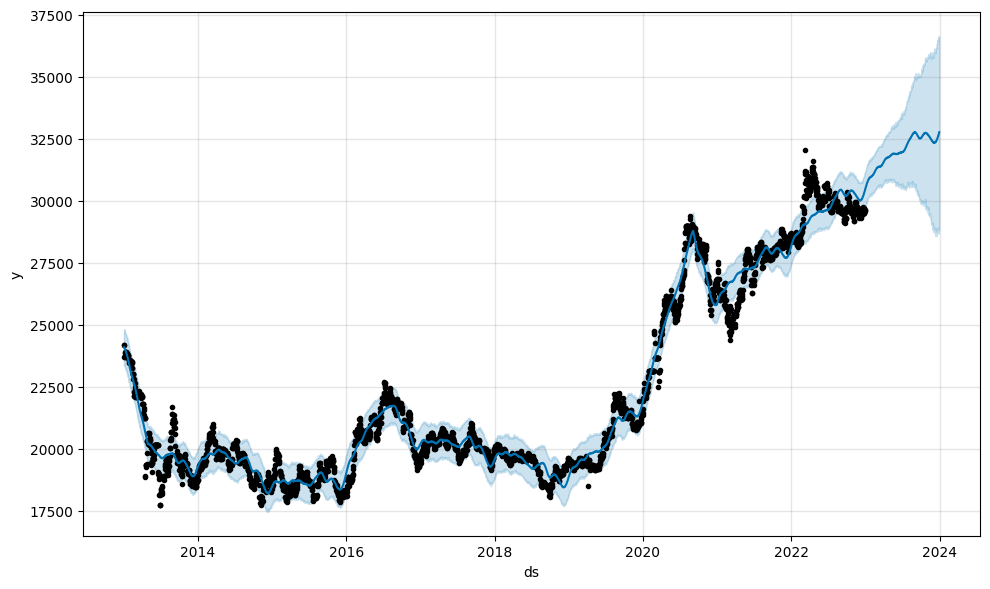

In [ ]:
fig1 = m.plot(forecast)

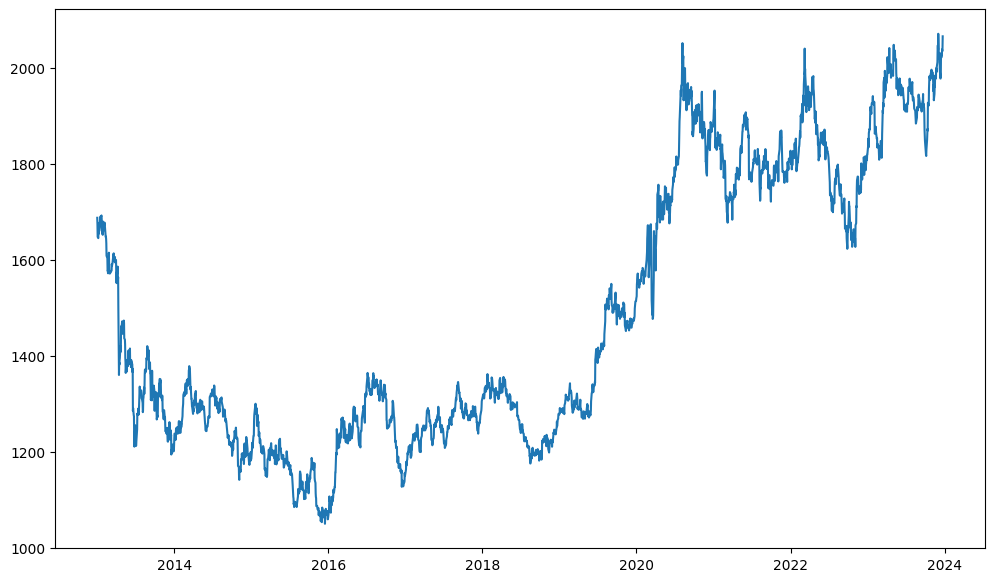

In [ ]:
go = yf.Ticker('GC=F') # ทองต่างประเทศ
go_df = GStock_price.history(interval = '1d', start = '2013-1-1', end = '2023-12-31')

plt.figure(figsize = (12, 7))
plt.plot(go_df.index, go_df['Close'])

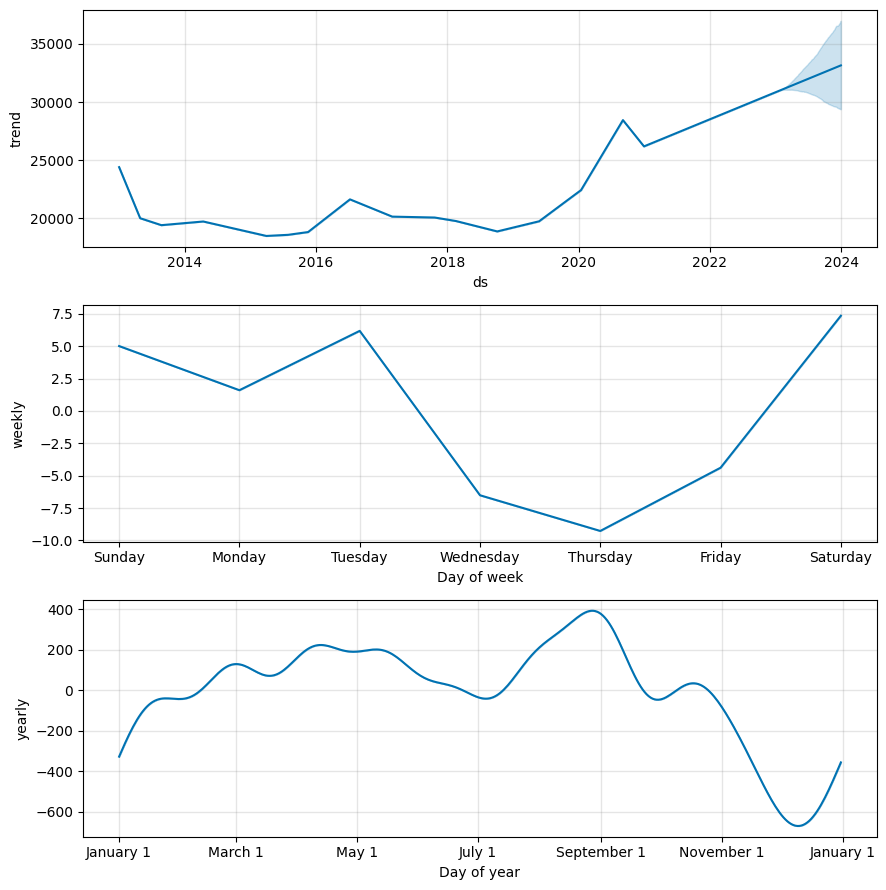

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2013-01-02  24408.062100  23369.064361  24767.533662  24408.062100   
1    2013-01-03  24370.560526  23339.708009  24786.384712  24370.560526   
2    2013-01-04  24333.058952  23430.872026  24830.908241  24333.058952   
3    2013-01-05  24295.557378  23396.404247  24766.166487  24295.557378   
4    2013-01-06  24258.055803  23322.721262  24799.844005  24258.055803   
...         ...           ...           ...           ...           ...   
4010 2023-12-26  33124.360975  28680.110785  36511.940468  29399.140674   
4011 2023-12-27  33130.716128  28785.580319  36609.445489  29395.192243   
4012 2023-12-28  33137.071282  28744.157972  36609.297870  29391.243812   
4013 2023-12-29  33143.426435  28842.806385  36638.205504  29387.295381   
4014 2023-12-30  33149.781589  28823.316938  36630.936547  29383.346950   

       trend_upper  additive_terms  additive_terms_lower  \
0     24408.062100     -310.909554           -310.909554   
1     24370.560526     -291.439033           -291.439033   
2     24333.058952     -264.768827           -264.768827   
3     24295.557378     -231.811654           -231.811654   
4     24258.055803     -213.629991           -213.629991   
...            ...             ...                   ...   
4010  36870.845077     -471.731800           -471.731800   
4011  36904.583555     -463.028784           -463.028784   
4012  36947.595548     -443.849941           -443.849941   
4013  36969.342373     -416.615199           -416.615199   
4014  36983.789452     -382.240106           -382.240106   

      additive_terms_upper    weekly  weekly_lower  weekly_upper      yearly  \
0              -310.909554 -6.514524     -6.514524     -6.514524 -304.395029   
1              -291.439033 -9.274443     -9.274443     -9.274443 -282.164590   
2              -264.768827 -4.385915     -4.385915     -4.385915 -260.382912   
3              -231.811654  7.359999      7.359999      7.359999 -239.171653   
4              -213.629991  5.017871      5.017871      5.017871 -218.647862   
...                    ...       ...           ...           ...         ...   
4010           -471.731800  6.192138      6.192138      6.192138 -477.923938   
4011           -463.028784 -6.514524     -6.514524     -6.514524 -456.514260   
4012           -443.849941 -9.274443     -9.274443     -9.274443 -434.575498   
4013           -416.615199 -4.385915     -4.385915     -4.385915 -412.229284   
4014           -382.240106  7.359999      7.359999      7.359999 -389.600105   

      yearly_lower  yearly_upper  multiplicative_terms  \
0      -304.395029   -304.395029                   0.0   
1      -282.164590   -282.164590                   0.0   
2      -260.382912   -260.382912                   0.0   
3      -239.171653   -239.171653                   0.0   
4      -218.647862   -218.647862                   0.0   
...            ...           ...                   ...   
4010   -477.923938   -477.923938                   0.0   
4011   -456.514260   -456.514260                   0.0   
4012   -434.575498   -434.575498                   0.0   
4013   -412.229284   -412.229284                   0.0   
4014   -389.600105   -389.600105                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0  24097.152546  
1                            0.0                         0.0  24079.121492  
2                            0.0                         0.0  24068.290125  
3                            0.0                         0.0  24063.745723  
4                            0.0                         0.0  24044.425813  
...                          ...                         ...           ...  
4010                         0.0                         0.0  32652.629174  
4011                         0.0                         0.0  32667.687344  
4012                         0.0        

In [ ]:
prophet_model_score = r2_score(forecast['yhat'][:3650], prophet_df['y'])
prophet_model_score

0.9786673934468831

#4. Visualization

In [ ]:
# สรุป score ของแต่ละ model

print('=== simple linear regression (random) ===\nscore : ', simscore)

print('\n=== simple linear regression (degree มากกว่า 1)\nscore : ', polyscore)

print('\n=== multiple linear regression (random) ===\nscore : ', mulscore)

print('\n=== Grid search ===\nscore : ', test_score)

print('\n=== multiple linear regression แบบไม่ random (split โดยคำนึงถึงช่วงเวลา) ===\nscore : ', muldate_score)

print('\n=== Prophet Model===\nscore : ', prophet_model_score)



=== simple linear regression (random) ===
score :  0.6596043699984426

=== simple linear regression (degree มากกว่า 1)
score :  0.9367761696533441

=== multiple linear regression (random) ===
score :  0.9671077697593939

=== Grid search ===
score :  0.9671077697593939

=== multiple linear regression แบบไม่ random (split โดยคำนึงถึงช่วงเวลา) ===
score :  0.9834517205854593

=== Prophet Model===
score :  0.9786673934468831


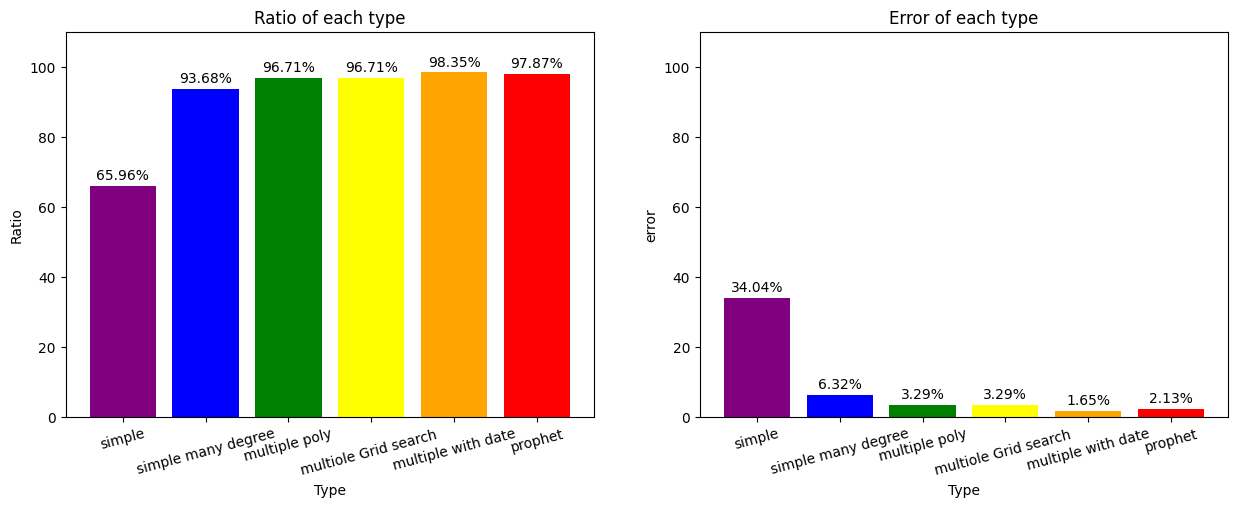

In [ ]:
# plot

# creat list
values = [simscore, polyscore, mulscore, test_score, muldate_score, prophet_model_score]

# creat list of type
value_names = ['simple',
               'simple many degree',
               'multiple poly',
               'multiole Grid search ',
               'multiple with date',
               'prophet']

# creat list of color
colors = ['purple', 'blue', 'green', 'yellow', 'orange', 'red']

# อัตราส่วน ในการทำนาย
ratio = []

for value in values:
  ratio.append(value * 100)

# bar chart
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.bar(value_names, ratio, color = colors)
plt.xlabel('Type')
plt.ylabel('Ratio')
plt.title('Ratio of each type')

plt.ylim(0, 110) # กำหนด range ของแกน y
plt.xticks(rotation = 15) # กำหนดองศาของแกน x

# show ratio
for i, percentage in enumerate(ratio):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# error

errors = []

for error in values:
  errors.append((1 - error) * 100)

plt.subplot(1, 2, 2)
plt.bar(value_names, errors, color = colors)
plt.xlabel('Type')
plt.ylabel('error')
plt.title('Error of each type')

plt.ylim(0, 110)
plt.xticks(rotation = 15)

for i, percentage in enumerate(errors):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


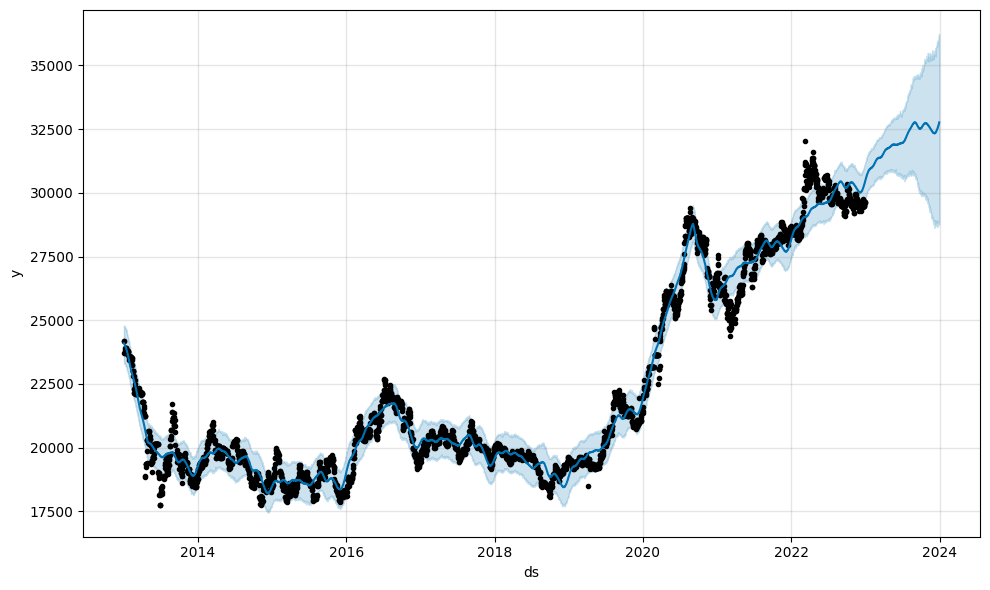

In [ ]:
# ลองเปลี่ยน periods

future = m.make_future_dataframe(periods = 365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)